## Import

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from matplotlib import rcParams
rcParams['figure.figsize'] = 12,8

## Data loading

In [3]:
train_data = pd.read_csv('train.csv')

In [4]:
test_data = pd.read_csv('test.csv')

In [5]:
train_data.shape

(1460, 81)

In [6]:
test_data.shape

(1459, 80)

In [7]:
train_data.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd       2003.0          RFn           2         548         TA   
1     Attchd       1976.0          RFn           2         460         TA   
2     Attchd       2001.0          RFn           2         608         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0           61              0          0   
1         TA          Y         298            0              0          0   
2         TA          Y           0           42              0          0   

   ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold  \
0            0         0    NaN   NaN         NaN        0       2    2008   
1            0         0    NaN   NaN         NaN        0       5    2007   
2            0         0    NaN   NaN         NaN        0       9    2008   

  SaleType SaleCondition  SalePrice  
0       WD        Normal     208500  
1       WD        Normal     181500  
2       WD        Normal     223500

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [10]:
train_data.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.351799  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

In [11]:
combine = [train_data, test_data]

## Analysis

In [12]:
def pie_box(col, title):
    labels = train_data[col].value_counts().index.tolist()
    fracs = train_data[col].value_counts().values
    plt.pie(fracs, labels=labels, autopct='%1.1f%%')
    plt.title(title)
    plt.show()
    
    sns.boxplot(data=train_data, y='SalePrice' , x=col)
    plt.show()

In [13]:
def pie_plot(col, title):
    labels = train_data[col].value_counts().index.tolist()
    fracs = train_data[col].value_counts().values
    plt.pie(fracs, labels=labels, autopct='%1.1f%%')
    plt.title(title)
    plt.show()

### Target Feature - SalePrice

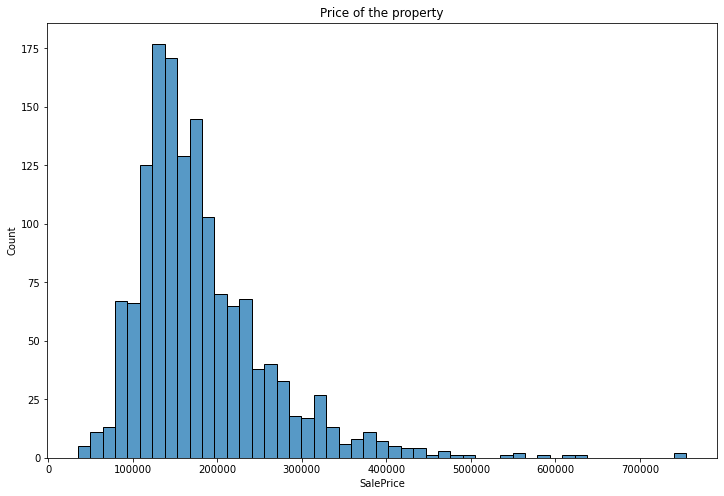

In [14]:
sns.histplot(train_data['SalePrice'])
plt.title('Price of the property')
plt.show()

In [15]:
cat_cols = train_data.select_dtypes(include=["object"]).columns

In [16]:
cat_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

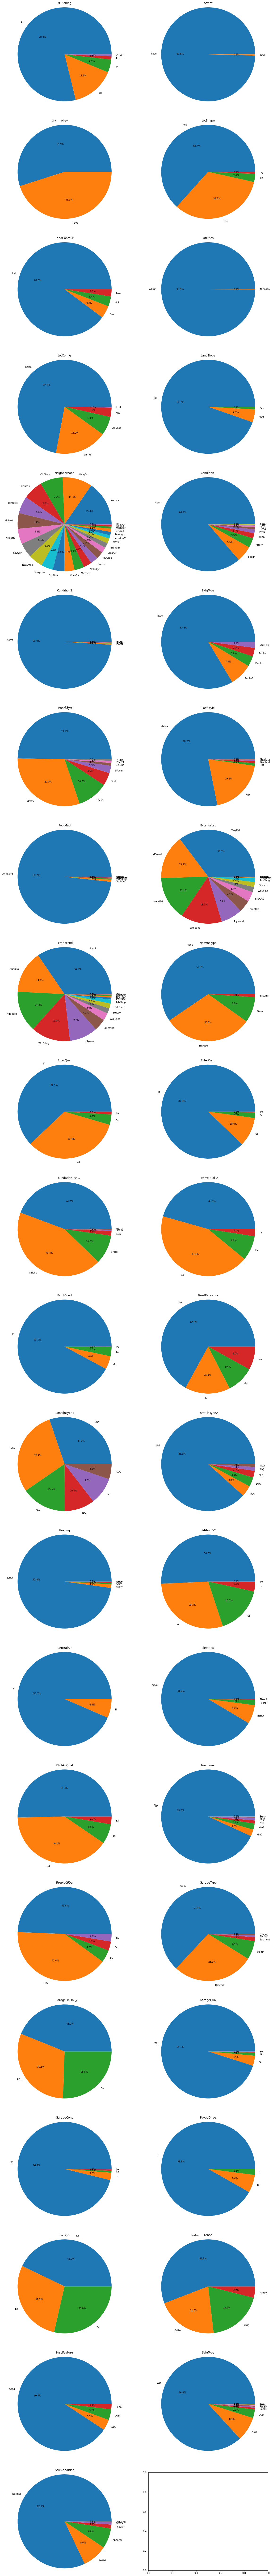

In [17]:
fig, axes = plt.subplots(len(cat_cols) // 2 + 1, 2, figsize=(20, 200))
axes = axes.flatten()
for ax, col in zip(axes, cat_cols):
    labels = train_data[col].value_counts().index.tolist()
    fracs = train_data[col].value_counts().values
    
    ax.pie(fracs, labels=labels, autopct='%1.1f%%', radius = 1.2)
    ax.set_title(col)

### MSSubClass

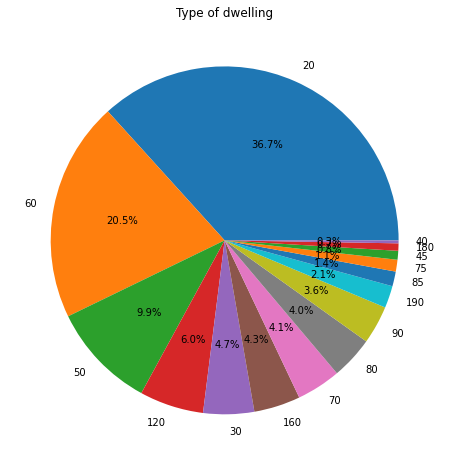

In [18]:
pie_plot('MSSubClass', 'Type of dwelling')

Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

Most of the dwellings are 1-STORY 1946 & NEWER ALL STYLES and 2-STORY 1946 & NEWER. Also this feature copied info from two other features - HouseStyle which contains number of stories and YearBuilt which contains the year of construction. There is no missing values in this features, so feature MSSubClass can be deleted.

### MSZoning

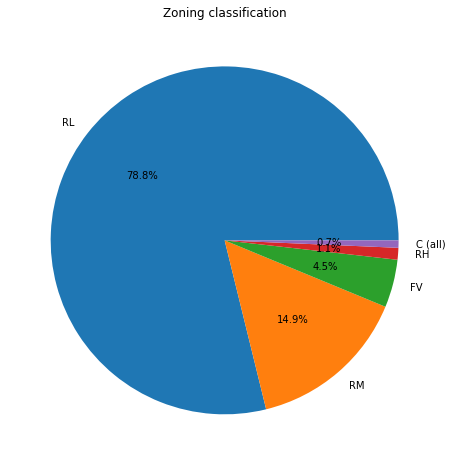

In [19]:
pie_plot('MSZoning', 'Zoning classification')

More that three quartes of houses located in Residential Low Density zones, and 15% in Residential Medium Density zones. We can fill in missing values by mode.

In [20]:
for dataset in combine:
    dataset['MSZoning'] = dataset['MSZoning'].fillna(train_data['MSZoning'].mode()[0])

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

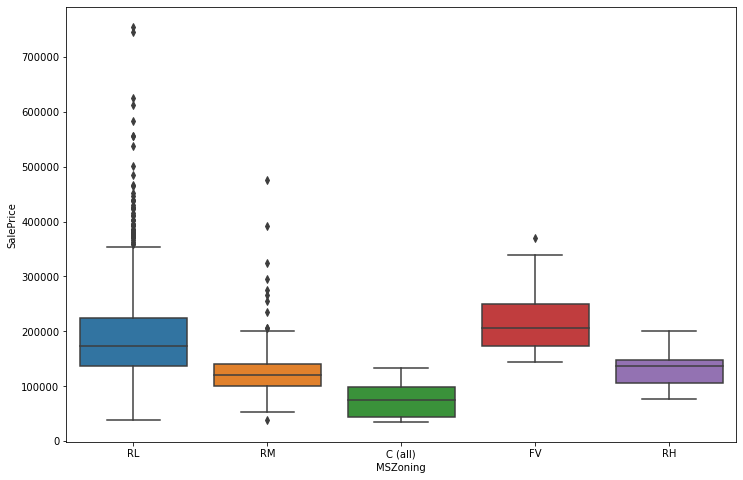

In [21]:
sns.boxplot(data=train_data, y='SalePrice' , x='MSZoning')

### LotFrontage

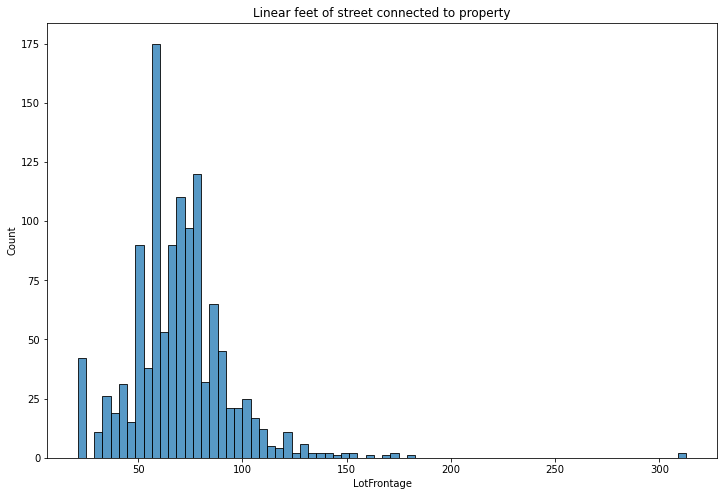

In [22]:
sns.histplot(train_data['LotFrontage'])
plt.title('Linear feet of street connected to property')
plt.show()

In [23]:
train_data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

LotFrontage plot has almost normal distribution with some outlier near 300 feet and peak at around 60. Apparently there are some rounded values. LotFrontage correlates with LotArea and 1stFlrSF, so we can use this features to fill in the gaps.

In [24]:
lr = LinearRegression()
lr.fit(train_data.dropna(subset=['LotFrontage'])[['LotArea', '1stFlrSF']], train_data['LotFrontage'].dropna())

LinearRegression()

In [25]:
for dataset in combine:
    LF_pred = pd.Series(lr.predict(dataset[['LotArea', '1stFlrSF']]))
    dataset['LotFrontage'] = dataset['LotFrontage'].fillna(LF_pred)

### LotArea

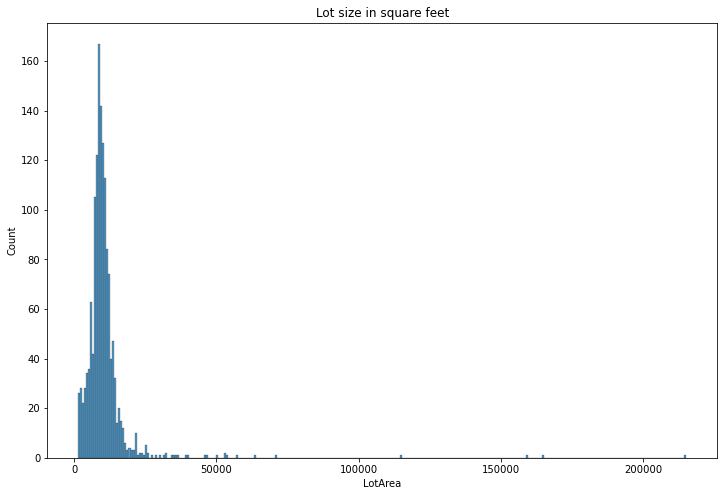

In [26]:
sns.histplot(train_data['LotArea'])
plt.title('Lot size in square feet')
plt.show()

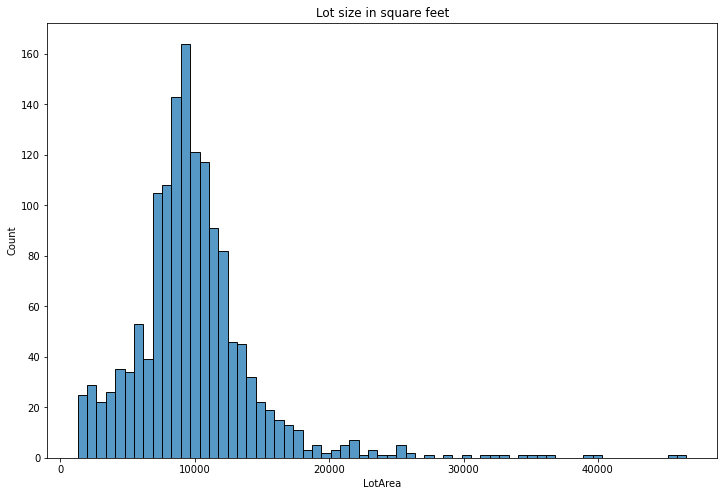

In [27]:
sns.histplot(train_data.query('LotArea < 50000 ')['LotArea'])
plt.title('Lot size in square feet')
plt.show()

In [28]:
train_data['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

Feature has some outliers.

In [29]:
train_data.query('LotArea > 50000 ')

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
53      54          20       RL    68.000000    50271   Pave   NaN      IR1   
249    250          50       RL   216.282054   159000   Pave   NaN      IR2   
313    314          20       RL   150.000000   215245   Pave   NaN      IR3   
335    336         190       RL   225.481454   164660   Grvl   NaN      IR1   
384    385          60       RL   108.788755    53107   Pave   NaN      IR2   
451    452          20       RL    62.000000    70761   Pave   NaN      IR1   
457    458          20       RL   121.873581    53227   Pave   NaN      IR1   
706    707          20       RL   183.566596   115149   Pave   NaN      IR2   
769    770          60       RL    47.000000    53504   Pave   NaN      IR2   
1298  1299          60       RL   313.000000    63887   Pave   NaN      IR3   
1396  1397          20       RL   126.135536    57200   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
53           Low    AllPub    Inside       Gtl      Veenker       Norm   
249          Low    AllPub   CulDSac       Sev      ClearCr       Norm   
313          Low    AllPub    Inside       Sev       Timber       Norm   
335          HLS    AllPub    Corner       Sev       Timber       Norm   
384          Low    AllPub    Corner       Mod      ClearCr      Feedr   
451          Low    AllPub    Inside       Mod      ClearCr       Norm   
457          Low    AllPub   CulDSac       Mod      ClearCr       Norm   
706          Low    AllPub   CulDSac       Sev      ClearCr       Norm   
769          HLS    AllPub   CulDSac       Mod      StoneBr       Norm   
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   
1396         Bnk    AllPub    Inside       Sev       Timber       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
53         Norm     1Fam     1Story            9            5       1981   
249        Norm     1Fam     1.5Fin            6            7       1958   
313        Norm     1Fam     1Story            7            5       1965   
335        Norm   2fmCon     1.5Fin            5            6       1965   
384        Norm     1Fam     2Story            6            5       1992   
451        Norm     1Fam     1Story            7            5       1975   
457        Norm     1Fam     1Story            4            6       1954   
706        Norm     1Fam     1Story            7            5       1971   
769        Norm     1Fam     2Story            8            5       2003   
1298       Norm     1Fam     2Story           10            5       2008   
1396       Norm     1Fam     1Story            5            5       1948   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
53            1987     Gable  WdShngl     WdShing     Wd Shng       None   
249           2006     Gable  CompShg     Wd Sdng     HdBoard     BrkCmn   
313           1965       Hip  CompShg     BrkFace     BrkFace       None   
335           1965     Gable  CompShg     Plywood     Plywood       None   
384           1992     Gable  CompShg     HdBoard     HdBoard       None   
451           1975     Gable  WdShngl     Plywood     Plywood       None   
457           1994      Flat  Tar&Grv     Plywood     Plywood       None   
706           2002     Gable  CompShg     Plywood     Plywood      Stone   
769           2003       Hip  CompShg     CemntBd     Wd Shng    BrkFace   
1298          2008       Hip  ClyTile      Stucco      Stucco      Stone   
1396          1950     Gable  CompShg     Wd Sdng     Wd Sdng       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
53           0.0        Gd        TA     CBlock       Ex       TA   
249        472.0        Gd        TA     CBlock       Gd       TA   
313          0.0        TA        TA     CBlock       Gd       TA   
335          0.0        TA        TA     CBlock       TA       TA   

### Street

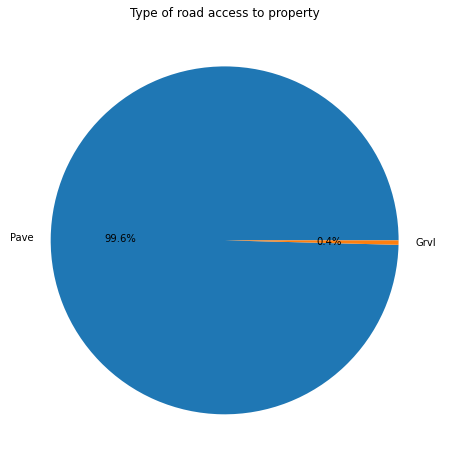

In [30]:
pie_plot('Street', 'Type of road access to property')

In [31]:
train_data['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

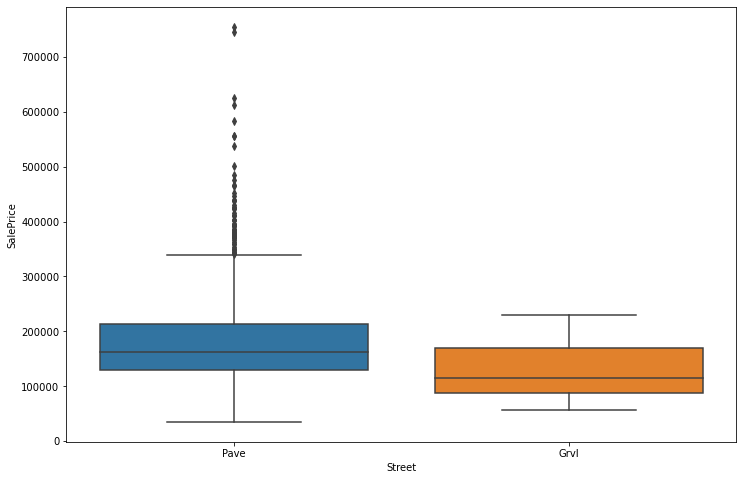

In [32]:
sns.boxplot(data=train_data, y='SalePrice' , x='Street')

Almost all of roads are paved. This feature might be useless.

### Alley

In [33]:
train_data['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

Alley feature has a lot of missing data, but by the data description we can suppose that it means that there is no alley access. We can fill in the gaps by 'NA'

In [34]:
for dataset in combine:
    dataset['Alley'] = dataset['Alley'].fillna('NA')

<AxesSubplot:xlabel='Alley', ylabel='SalePrice'>

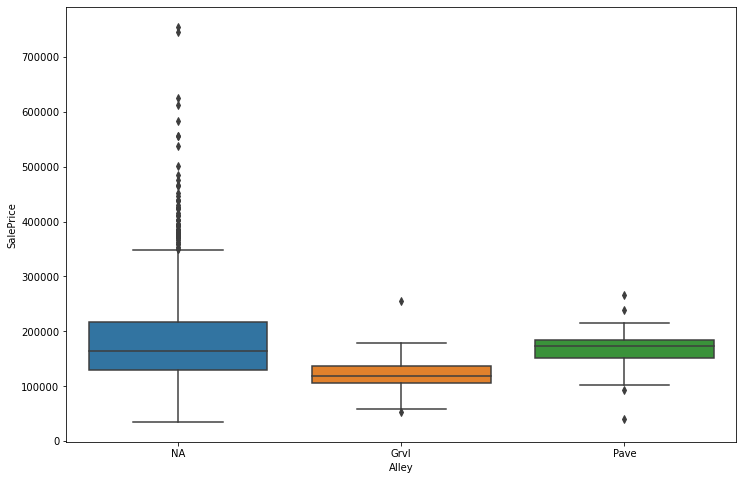

In [35]:
sns.boxplot(data=train_data, y='SalePrice' , x='Alley')

### LotShape

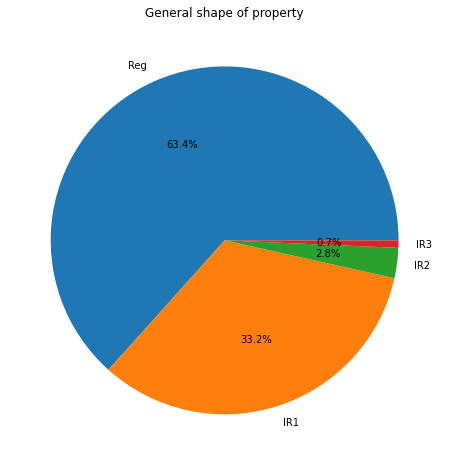

In [36]:
pie_plot('LotShape', 'General shape of property')

<AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>

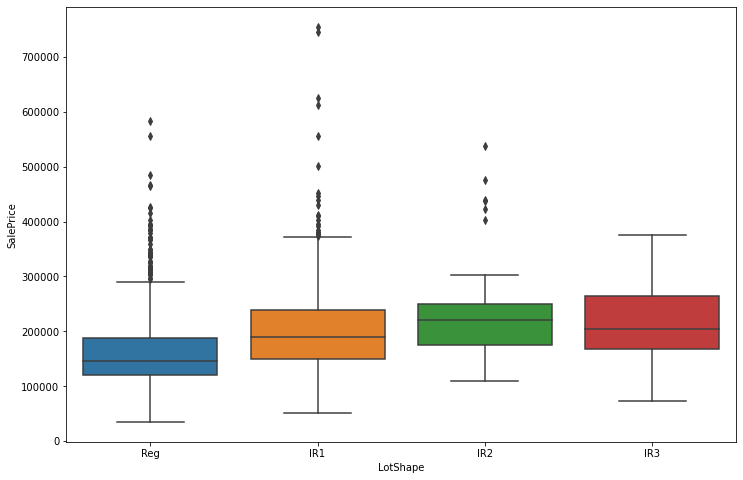

In [37]:
sns.boxplot(data=train_data, y='SalePrice' , x='LotShape')

More than half of properties have regular form.

### LandContour 

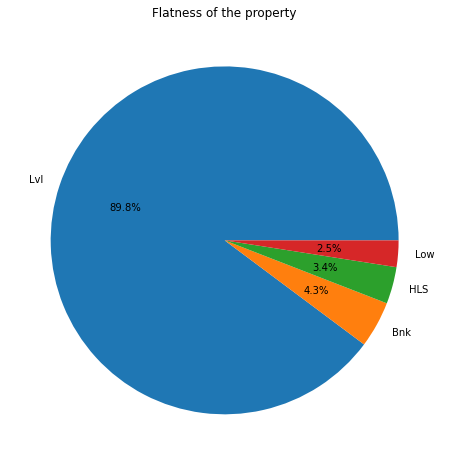

In [38]:
pie_plot('LandContour', 'Flatness of the property')

<AxesSubplot:xlabel='LandContour', ylabel='SalePrice'>

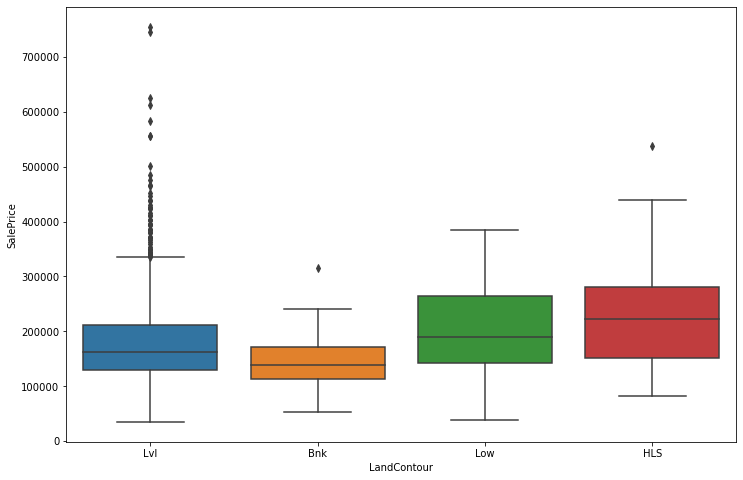

In [39]:
sns.boxplot(data=train_data, y='SalePrice' , x='LandContour')

Most of the property is flat.

### Utilities

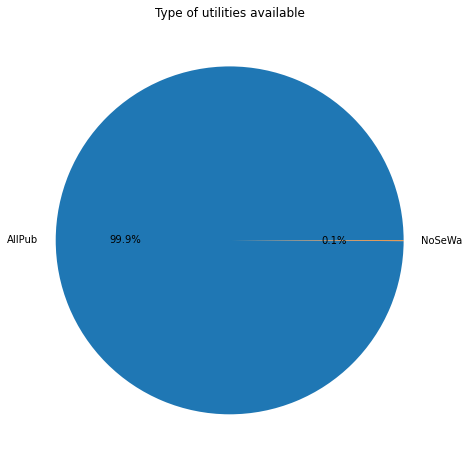

In [40]:
pie_plot('Utilities', 'Type of utilities available')

In [41]:
train_data['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [42]:
for dataset in combine:
    dataset['Utilities'] = dataset['Utilities'].fillna(train_data['Utilities'].mode()[0])

Almost all properties have all public utilities. This feature might be useless.

### LotConfig

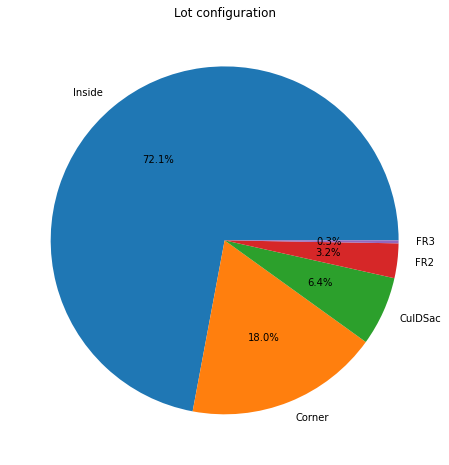

In [43]:
pie_plot('LotConfig', 'Lot configuration')

<AxesSubplot:xlabel='LotConfig', ylabel='SalePrice'>

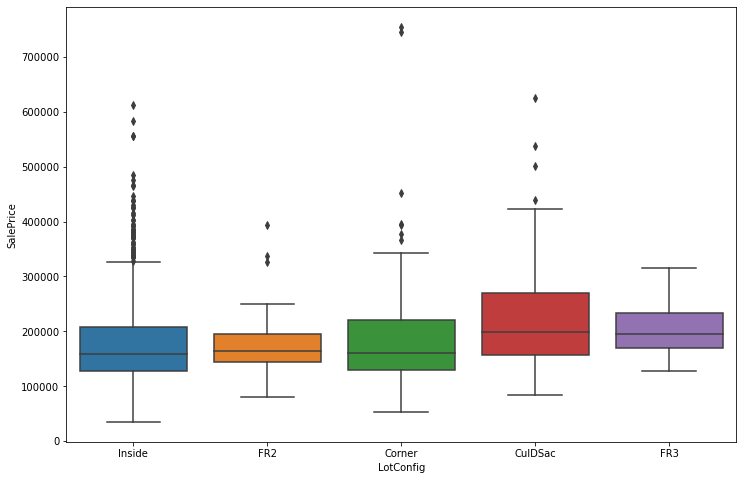

In [44]:
sns.boxplot(data=train_data, y='SalePrice' , x='LotConfig')

### LandSlope

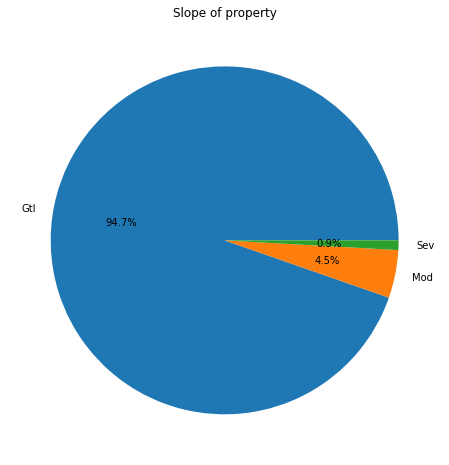

In [45]:
pie_plot('LandSlope', 'Slope of property')

<AxesSubplot:xlabel='LandSlope', ylabel='SalePrice'>

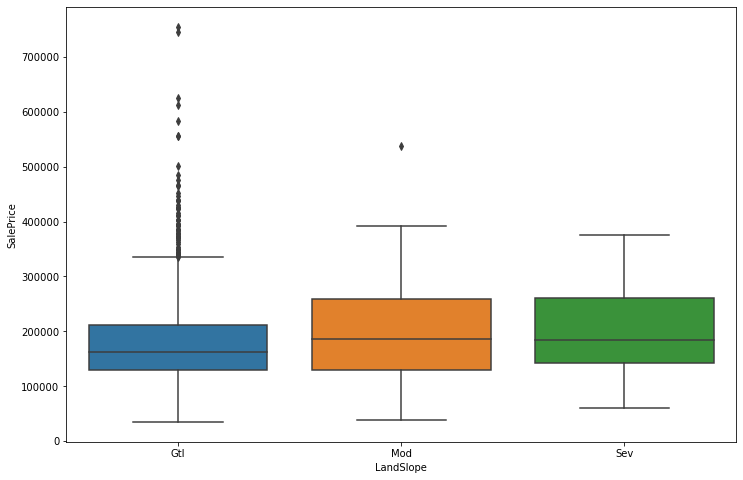

In [46]:
sns.boxplot(data=train_data, y='SalePrice' , x='LandSlope')

### Neighborhood

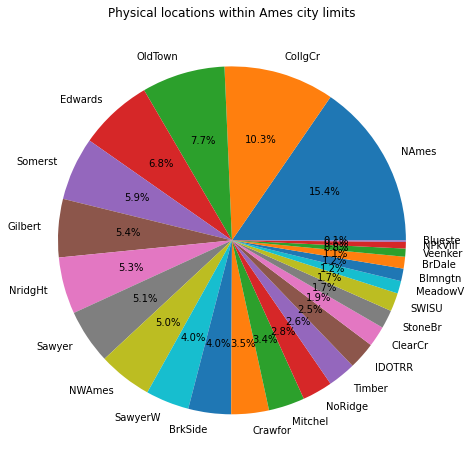

In [47]:
pie_plot('Neighborhood', 'Physical locations within Ames city limits')

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

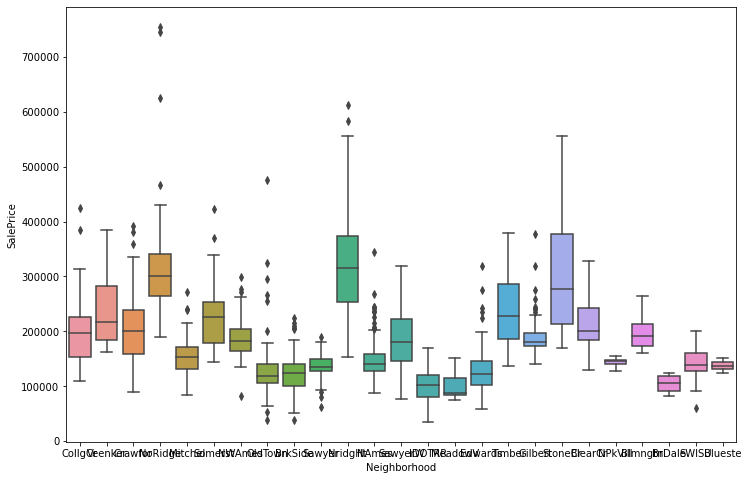

In [48]:
sns.boxplot(data=train_data, y='SalePrice' , x='Neighborhood')

We can see that houses in some neighbouhoods are significantly more expensive that in the others.

### Condition1 & Condition2

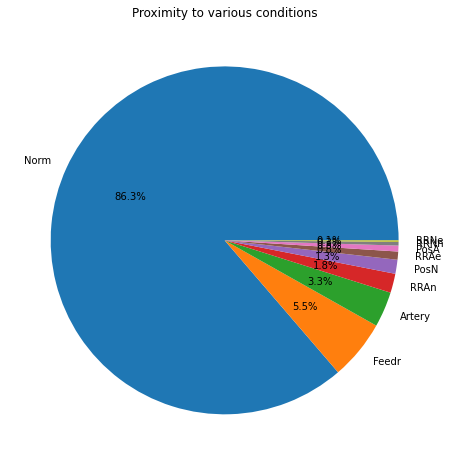

In [49]:
pie_plot('Condition1', 'Proximity to various conditions')

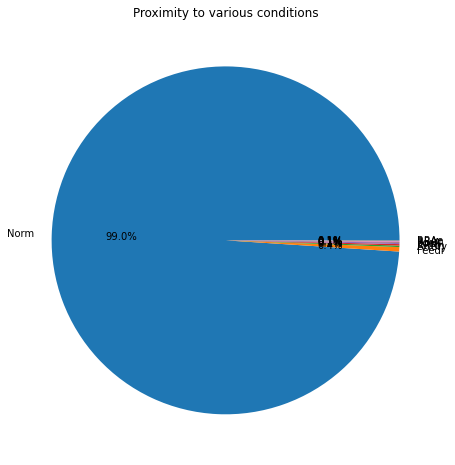

In [50]:
pie_plot('Condition2', 'Proximity to various conditions')

<AxesSubplot:xlabel='Condition1', ylabel='SalePrice'>

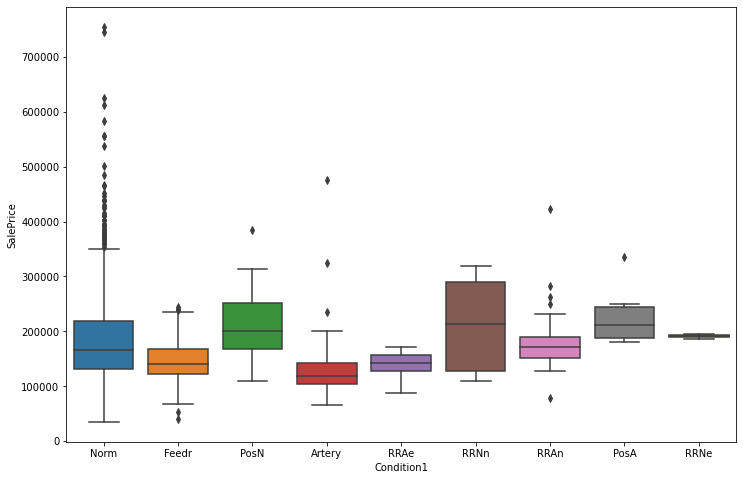

In [51]:
sns.boxplot(data=train_data, y='SalePrice' , x='Condition1')

We can combine these features into one.

### BldgType

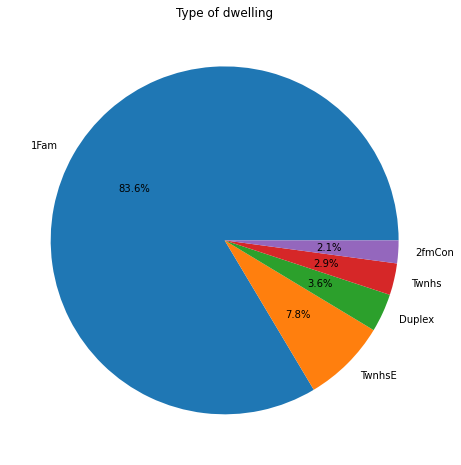

In [52]:
pie_plot('BldgType', 'Type of dwelling')

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

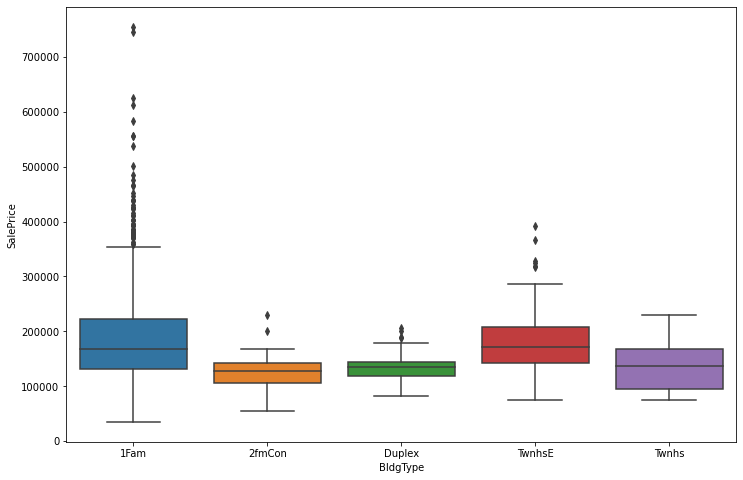

In [53]:
sns.boxplot(data=train_data, y='SalePrice' , x='BldgType')

### HouseStyle

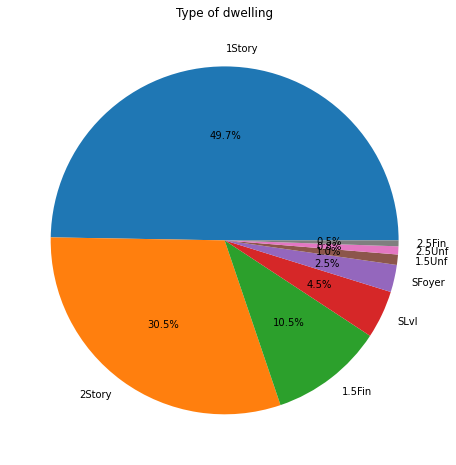

In [54]:
pie_plot('HouseStyle', 'Type of dwelling')

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

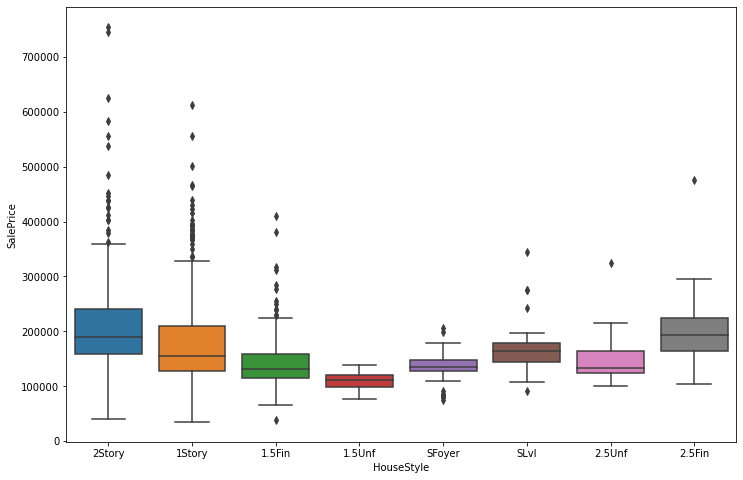

In [55]:
sns.boxplot(data=train_data, y='SalePrice' , x='HouseStyle')

### OverallQual

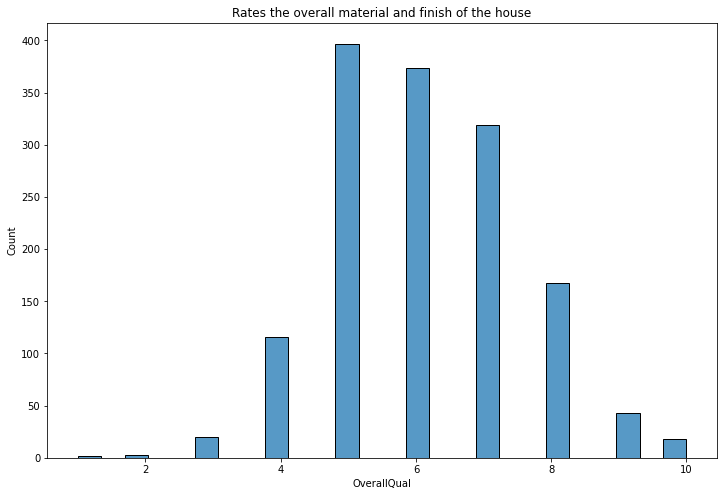

In [56]:
sns.histplot(train_data['OverallQual'])
plt.title('Rates the overall material and finish of the house')
plt.show()

### OverallCond

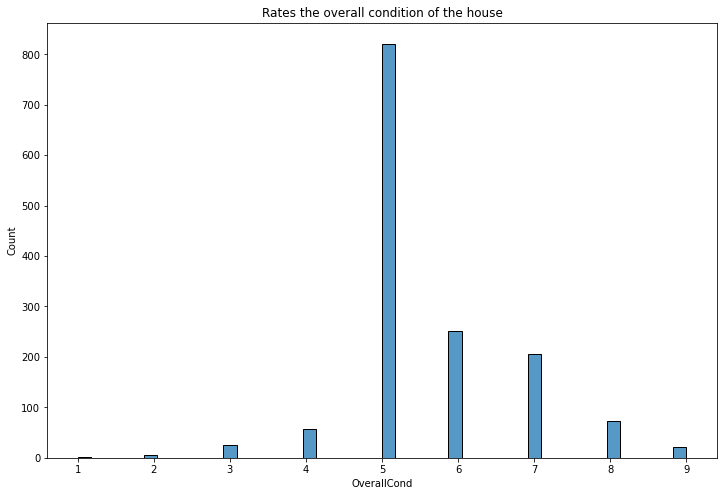

In [57]:
sns.histplot(train_data['OverallCond'])
plt.title('Rates the overall condition of the house')
plt.show()

### YearBuilt

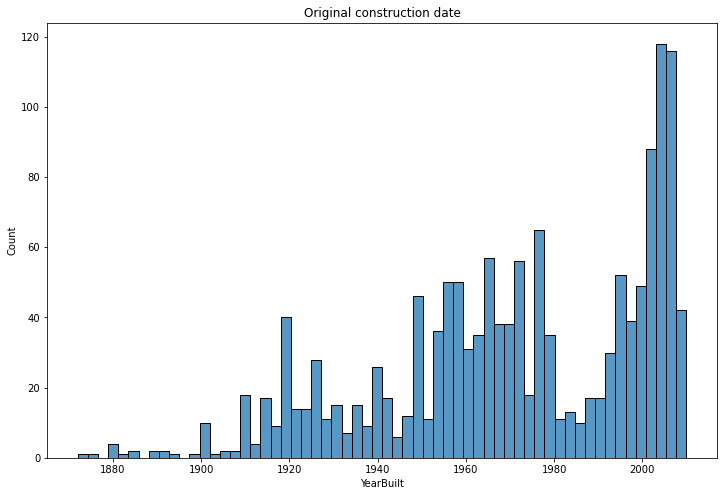

In [58]:
sns.histplot(train_data['YearBuilt'], bins=60)
plt.title('Original construction date')
plt.show()

### YearRemodAdd

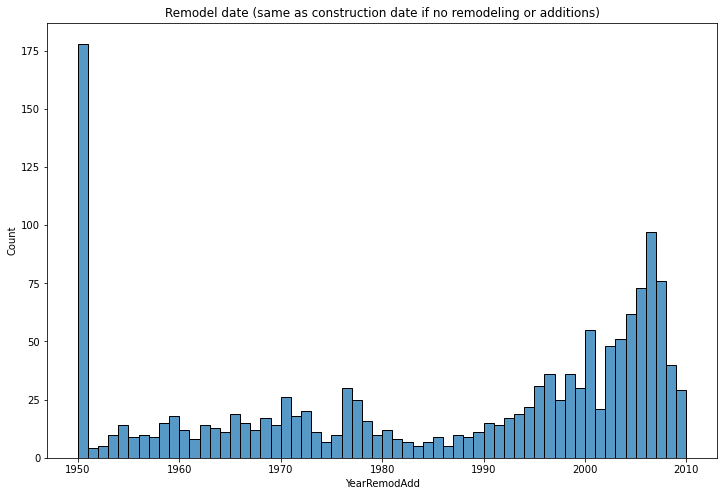

In [59]:
sns.histplot(train_data['YearRemodAdd'], bins=60)
plt.title('Remodel date (same as construction date if no remodeling or additions)')
plt.show()

### RoofStyle

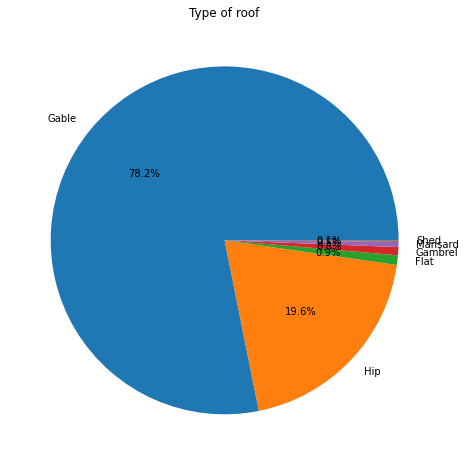

In [60]:
pie_plot('RoofStyle', 'Type of roof')

<AxesSubplot:xlabel='RoofStyle', ylabel='SalePrice'>

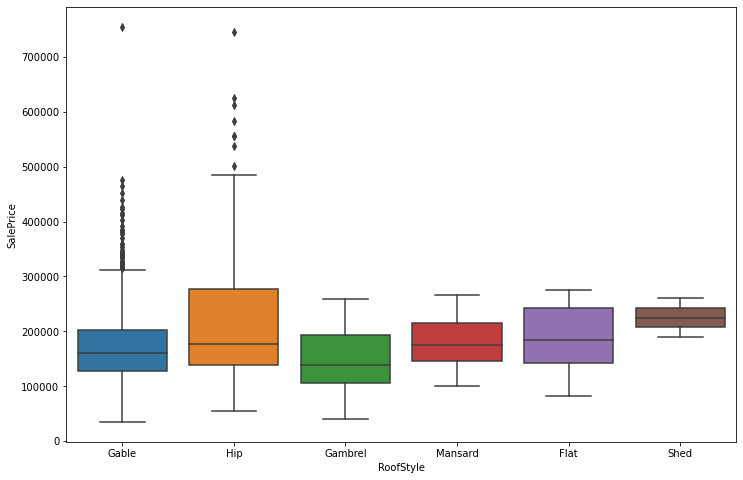

In [61]:
sns.boxplot(data=train_data, y='SalePrice' , x='RoofStyle')

### RoofMatl

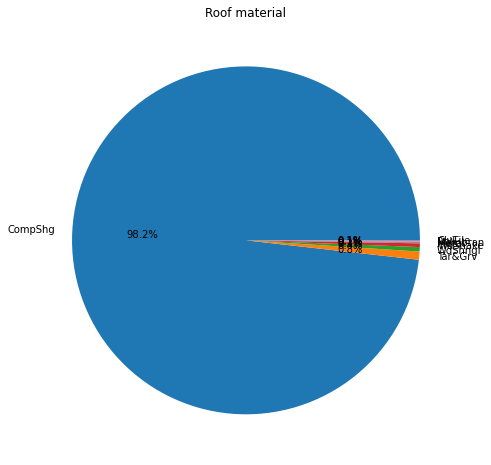

In [62]:
pie_plot('RoofMatl', 'Roof material')

<AxesSubplot:xlabel='RoofMatl', ylabel='SalePrice'>

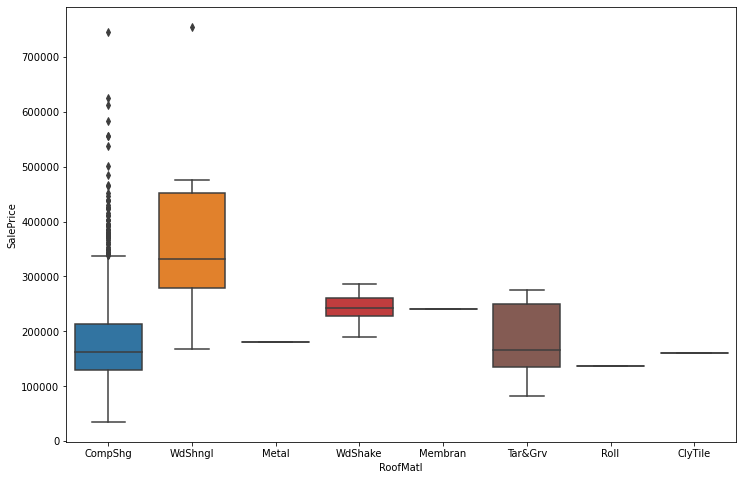

In [63]:
sns.boxplot(data=train_data, y='SalePrice' , x='RoofMatl')

### Exterior1st & Exterior2nd

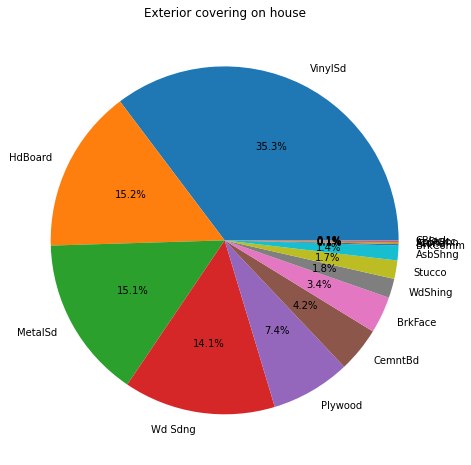

In [64]:
pie_plot('Exterior1st', 'Exterior covering on house')

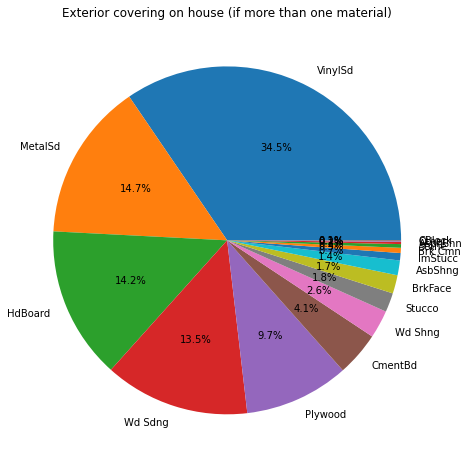

In [65]:
pie_plot('Exterior2nd', 'Exterior covering on house (if more than one material)')

<AxesSubplot:xlabel='Exterior1st', ylabel='SalePrice'>

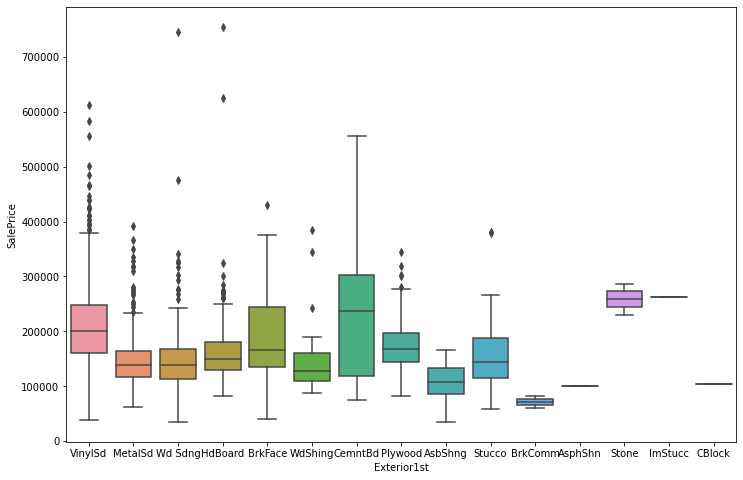

In [66]:
sns.boxplot(data=train_data, y='SalePrice' , x='Exterior1st')

In [67]:
for dataset in combine:
    dataset['Exterior1st'] = dataset['Exterior1st'].fillna(train_data['Exterior1st'].mode()[0])
    dataset['Exterior2nd'] = dataset['Exterior2nd'].fillna(train_data['Exterior2nd'].mode()[0])

### MasVnrType

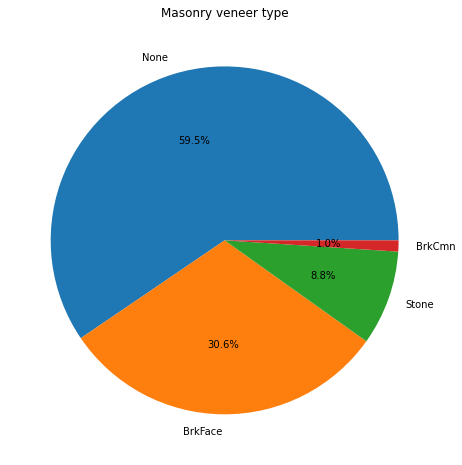

In [68]:
pie_plot('MasVnrType', 'Masonry veneer type')

<AxesSubplot:xlabel='MasVnrType', ylabel='SalePrice'>

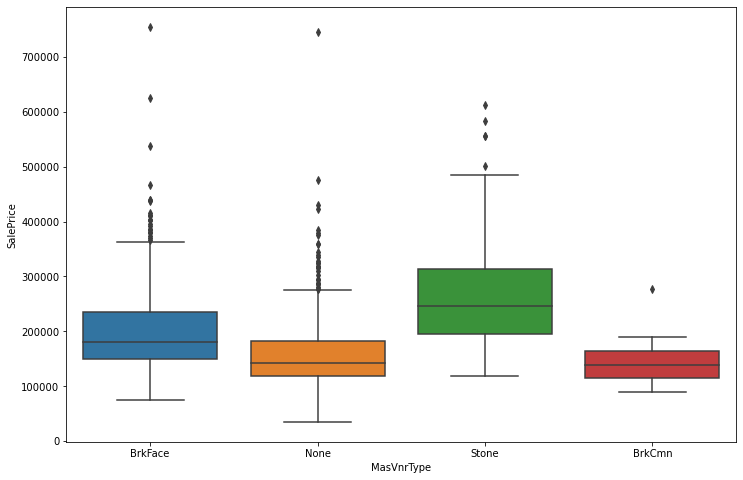

In [69]:
sns.boxplot(data=train_data, y='SalePrice' , x='MasVnrType')

In [70]:
for dataset in combine:
    dataset['MasVnrType'] = dataset['MasVnrType'].fillna(train_data['MasVnrType'].mode()[0])

### MasVnrArea

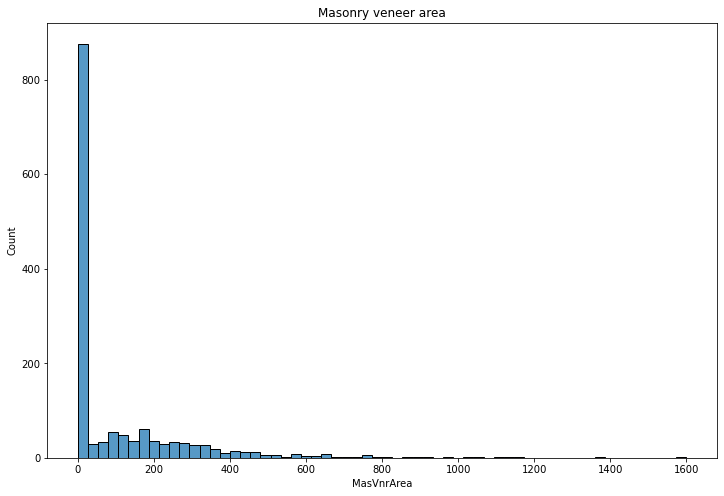

In [71]:
sns.histplot(train_data['MasVnrArea'], bins=60)
plt.title('Masonry veneer area')
plt.show()

In [72]:
for dataset in combine:
    dataset.loc[(dataset['MasVnrType'] == 'None') & (dataset['MasVnrArea'].isna()), 'MasVnrArea'] = 0
    dataset.loc[dataset['MasVnrArea'].isna(), 'MasVnrArea'] = dataset.query('MasVnrArea > 0')['MasVnrArea'].mean()

### ExterQual

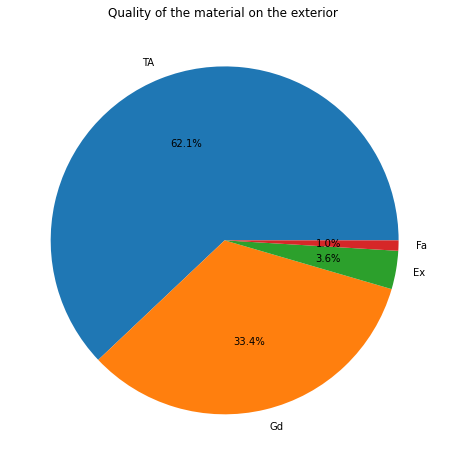

In [73]:
pie_plot('ExterQual', 'Quality of the material on the exterior ')

<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

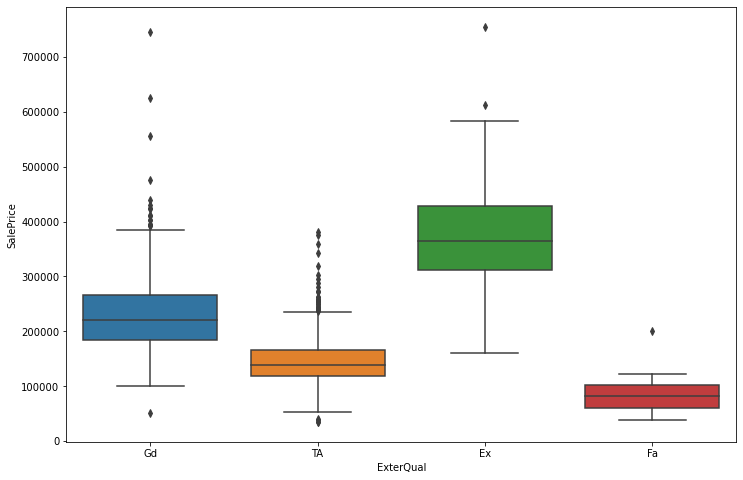

In [74]:
sns.boxplot(data=train_data, y='SalePrice' , x='ExterQual')

### ExterCond

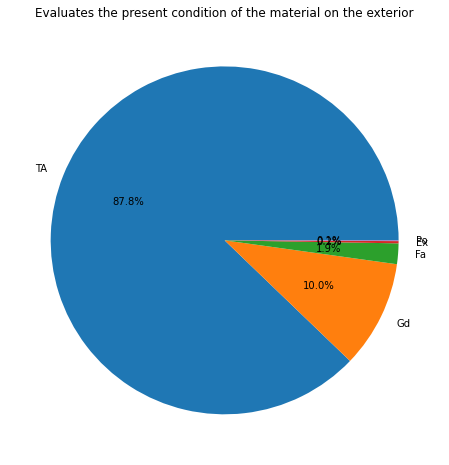

In [75]:
pie_plot('ExterCond', 'Evaluates the present condition of the material on the exterior')

### Foundation

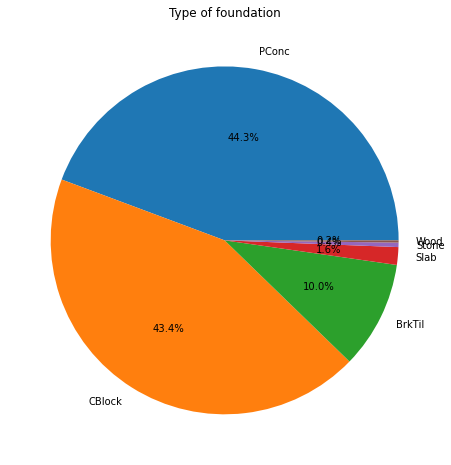

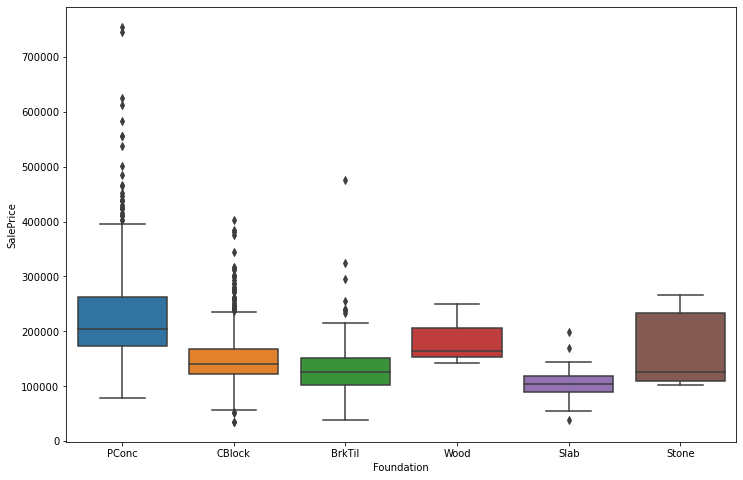

In [76]:
pie_box('Foundation', 'Type of foundation')

### BsmtQual

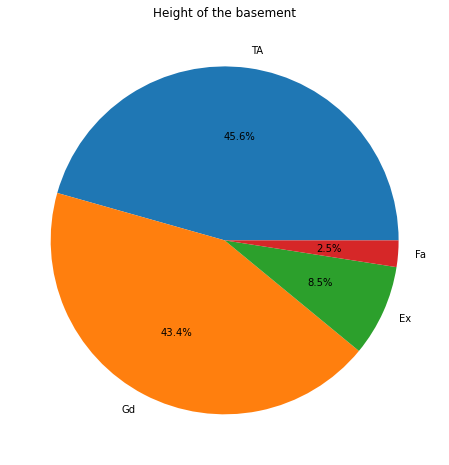

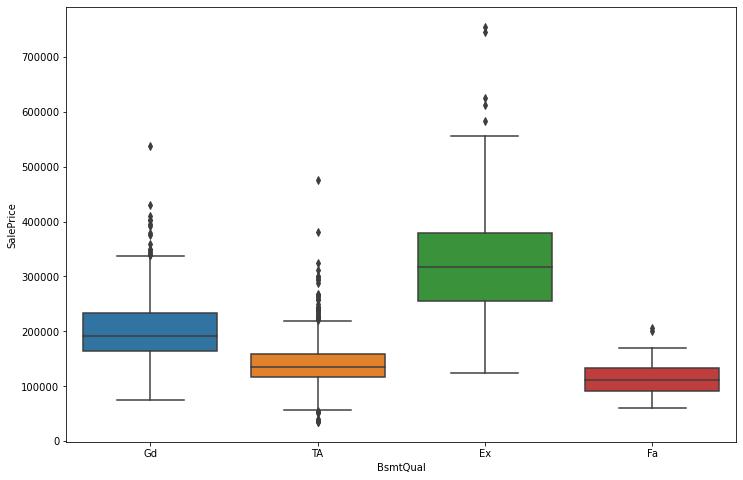

In [77]:
pie_box('BsmtQual', 'Height of the basement')

In [78]:
for dataset in combine:
    dataset['BsmtQual'] = dataset['BsmtQual'].fillna('NA')

### BsmtCond

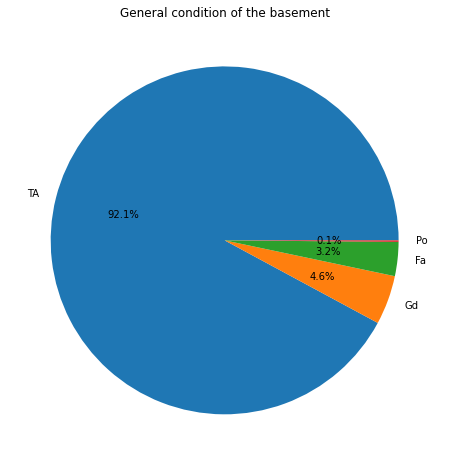

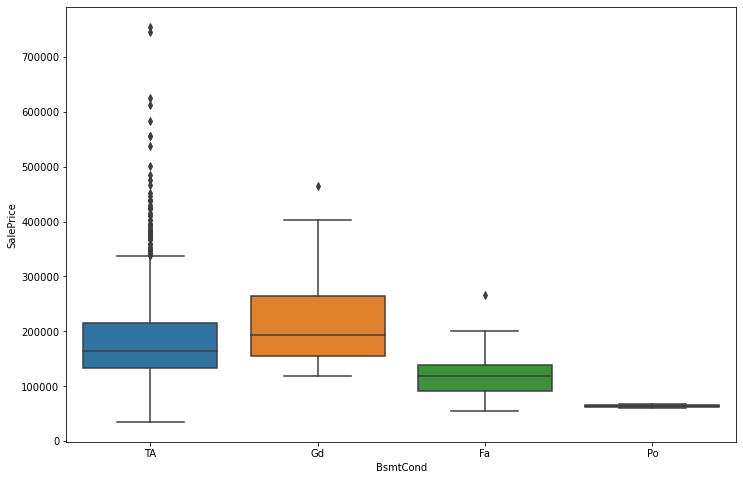

In [79]:
pie_box('BsmtCond', 'General condition of the basement')

In [80]:
for dataset in combine:
    dataset['BsmtCond'] = dataset['BsmtCond'].fillna('NA')

### BsmtExposure

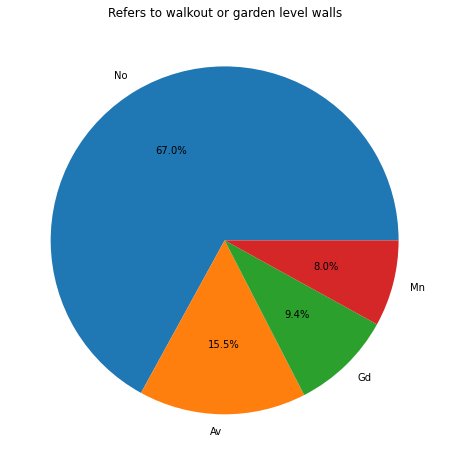

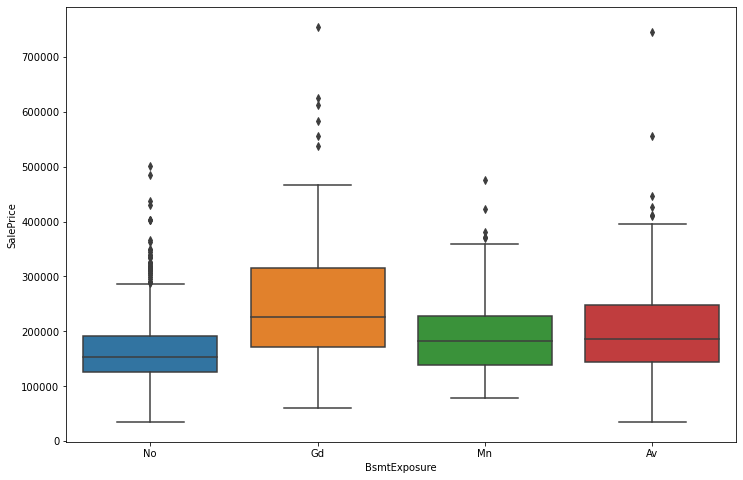

In [81]:
pie_box('BsmtExposure', 'Refers to walkout or garden level walls')

In [82]:
for dataset in combine:
    dataset['BsmtExposure'] = dataset['BsmtExposure'].fillna('NA')

### BsmtFinType1

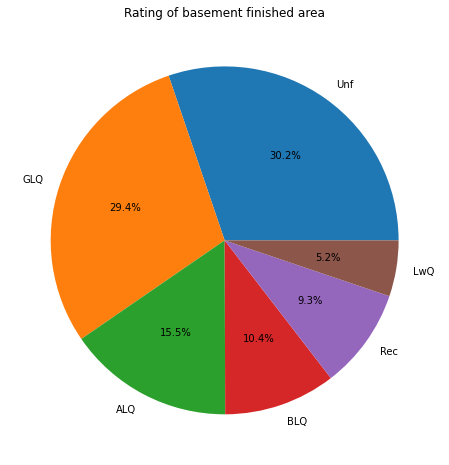

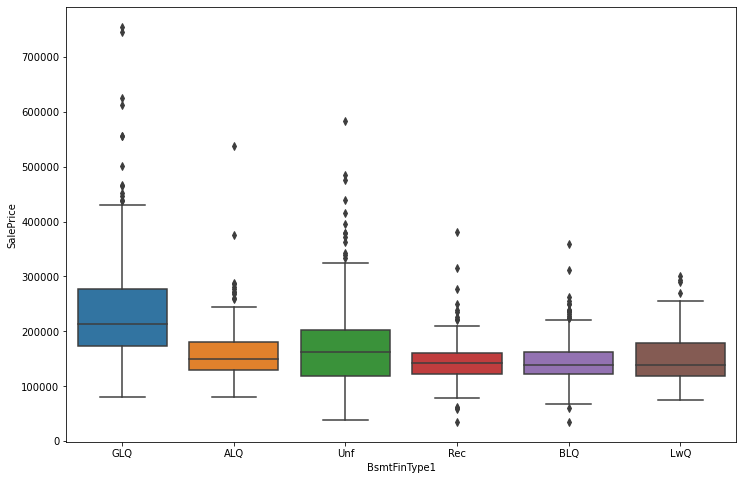

In [83]:
pie_box('BsmtFinType1', 'Rating of basement finished area')

In [84]:
dataset[dataset['BsmtFinType1'].isna()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
125   1586          30       RL    67.000000     8777   Pave    NA      Reg   
133   1594          90       RH    60.000000     7200   Pave  Pave      Reg   
269   1730          90       RL    75.000000     8250   Pave    NA      Reg   
318   1779          20       RL    75.000000     9533   Pave    NA      Reg   
354   1815          30       RM    50.000000     5925   Pave    NA      Reg   
387   1848          20       RL    58.085105     9000   Pave    NA      Reg   
388   1849          20       RL    80.372133    15635   Pave    NA      IR1   
396   1857          70       RL   120.000000    26400   Pave    NA      Reg   
397   1858          90       RL    64.000000     7018   Pave    NA      Reg   
398   1859          90       RL    64.000000     7018   Pave    NA      Reg   
400   1861          90       RL    64.000000     7007   Pave    NA      Reg   
455   1916          30       RL   109.000000    21780   Grvl    NA      Reg   
590   2051          20       RL    74.000000     7785   Pave    NA      IR1   
606   2067          20       RL    71.000000     8838   Pave    NA      Reg   
608   2069          20       RL    60.000000    10122   Pave    NA      Reg   
660   2121          20       RM    99.000000     5940   Pave    NA      IR1   
662   2123          30       RM    58.669562     6120   Pave    NA      Reg   
728   2189          20       RL   123.000000    47007   Pave    NA      IR1   
729   2190          90       RL    65.000000     6012   Pave    NA      Reg   
730   2191          90       RL    74.000000     6845   Pave    NA      Reg   
733   2194          50       RL    57.000000     8050   Pave    NA      Reg   
756   2217          20       RL    80.000000    14584   Pave    NA      Reg   
764   2225          90       RL    76.000000    10260   Pave    NA      Reg   
927   2388          90       RL    72.395354    10899   Pave    NA      IR1   
975   2436          20       RL    70.000000     7000   Pave    NA      Reg   
992   2453          20       RM    52.000000     8626   Pave    NA      Reg   
993   2454          80       RM    76.000000    11800   Pave    NA      Reg   
1030  2491          20       RL    65.592988     9000   Pave    NA      Reg   
1038  2499          30       RL    66.731739    11515   Pave    NA      IR1   
1087  2548          90       RL    68.379574     9555   Pave    NA      IR1   
1092  2553          90       RL    74.000000     6882   Pave    NA      Reg   
1104  2565          20       RL   126.000000    13108   Pave    NA      IR2   
1118  2579          50       RM    64.000000    11067   Pave    NA      Reg   
1139  2600          20       RL   200.000000    43500   Pave    NA      Reg   
1242  2703          90       RM    68.000000     8927   Pave    NA      Reg   
1303  2764          20       RL    86.000000    11650   Pave    NA      Reg   
1306  2767          90       RL    60.000000     8544   Pave    NA      Reg   
1343  2804          20       RL   100.000000    21370   Pave    NA      Reg   
1344  2805          30       RL    55.000000     8250   Pave    NA      Reg   
1364  2825          20       RL    80.000000    12048   Pave    NA      Reg   
1431  2892          30  C (all)    69.000000    12366   Pave    NA      Reg   
1444  2905          20       RL   125.000000    31250   Pave    NA      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
125          Lvl    AllPub    Inside       Mod      Edwards      Feedr   
133          Lvl    AllPub    Inside       Gtl        SWISU       Norm   
269          Lvl    AllPub    Inside       Gtl      SawyerW       Norm   
318          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
354          Lvl    AllPub    Corner       Gtl      OldTown       Norm   
387          Lvl    AllPub    Corner       Gtl       Sawyer       Norm   
388          Lvl    AllPub   CulDSac       Gtl      Edwards       Norm   
396          Bnk  

In [85]:
for dataset in combine:
    dataset['BsmtFinType1'] = dataset['BsmtFinType1'].fillna('NA')

### BsmtFinSF1

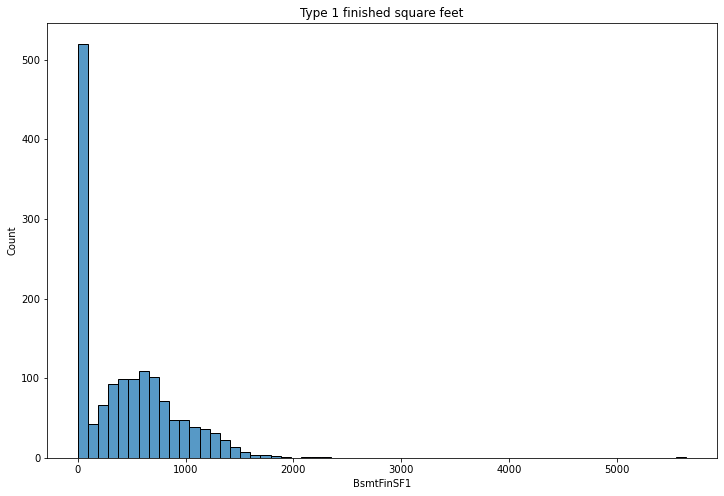

In [86]:
sns.histplot(train_data['BsmtFinSF1'], bins=60)
plt.title('Type 1 finished square feet')
plt.show()

In [87]:
for dataset in combine:
    dataset.loc[(dataset['BsmtFinType1'] == 'NA') & (dataset['BsmtFinSF1'].isna()), 'BsmtFinSF1'] = 0
    dataset.loc[dataset['BsmtFinSF1'].isna(), 'BsmtFinSF1'] = dataset.query('BsmtFinSF1 > 0')['BsmtFinSF1'].mean()

### BsmtFinType2

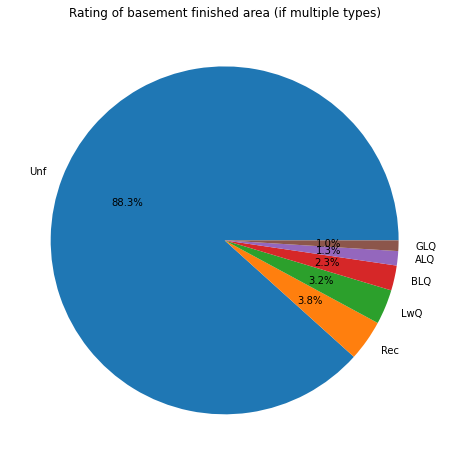

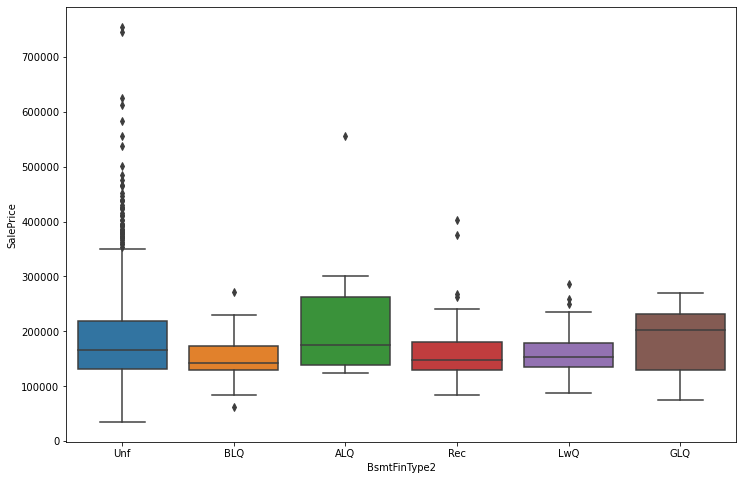

In [88]:
pie_box('BsmtFinType2', 'Rating of basement finished area (if multiple types)')

In [89]:
for dataset in combine:
    dataset['BsmtFinType2'] = dataset['BsmtFinType2'].fillna('NA')

### BsmtFinSF2

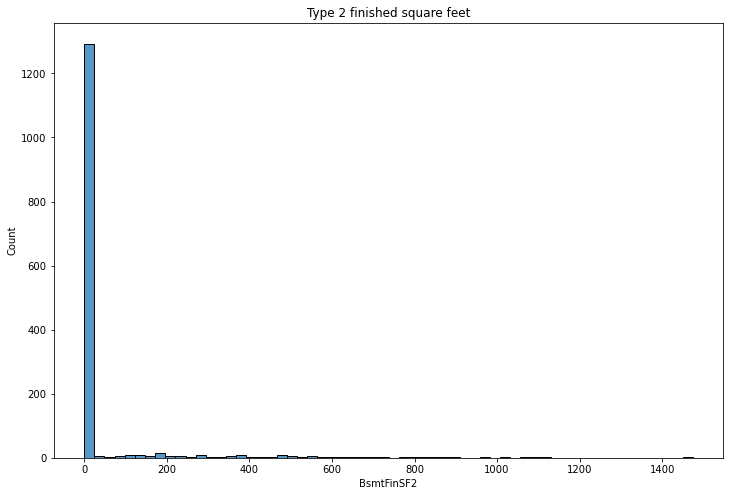

In [90]:
sns.histplot(train_data['BsmtFinSF2'], bins=60)
plt.title('Type 2 finished square feet')
plt.show()

In [91]:
for dataset in combine:
    dataset.loc[(dataset['BsmtFinType2'] == 'NA') & (dataset['BsmtFinSF2'].isna()), 'BsmtFinSF2'] = 0
    dataset.loc[dataset['BsmtFinSF2'].isna(), 'BsmtFinSF2'] = dataset.query('BsmtFinSF2 > 0')['BsmtFinSF2'].mean()

Almost all of the houses have only one type of basement finishing, so this feature is not significant.

### BsmtUnfSF

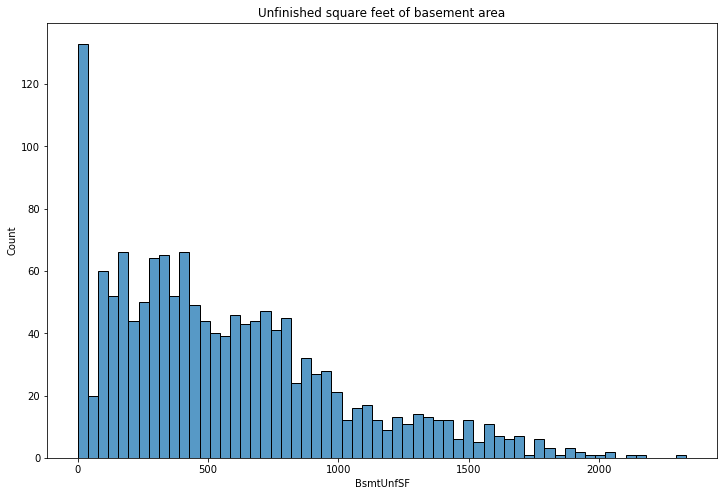

In [92]:
sns.histplot(train_data['BsmtUnfSF'], bins=60)
plt.title('Unfinished square feet of basement area')
plt.show()

In [93]:
for dataset in combine:
    dataset.loc[(dataset['BsmtExposure'] == 'NA') & (dataset['BsmtUnfSF'].isna()), 'BsmtUnfSF'] = 0
    dataset.loc[dataset['BsmtUnfSF'].isna(), 'BsmtUnfSF'] = dataset.query('BsmtUnfSF > 0')['BsmtUnfSF'].mean()

There is a lot of unfinished basements, we can try to combine all the information about basement into three  features, total basement area, unfinished basement area and good quality basement area.

### TotalBsmtSF

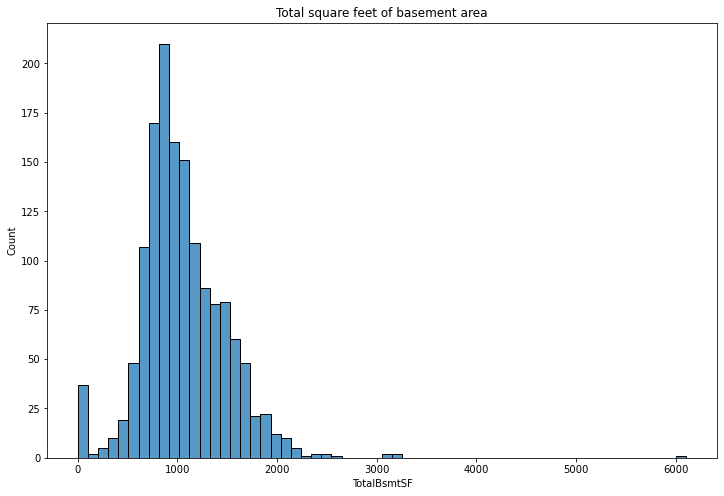

In [94]:
sns.histplot(train_data['TotalBsmtSF'], bins=60)
plt.title('Total square feet of basement area')
plt.show()

In [95]:
for dataset in combine:
    dataset.loc[dataset['TotalBsmtSF'].isna(), 'TotalBsmtSF'] = dataset['BsmtFinSF1'] + dataset['BsmtFinSF2'] + dataset['BsmtUnfSF']

### Heating

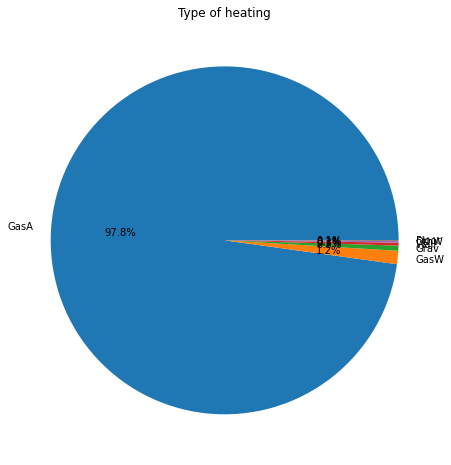

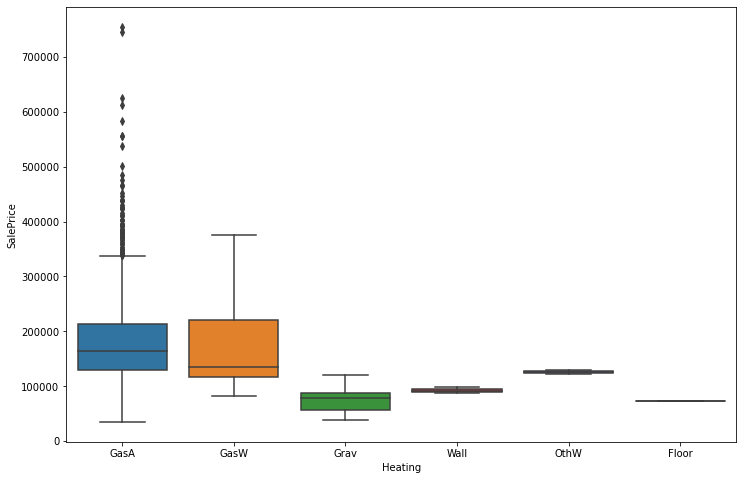

In [96]:
pie_box('Heating', 'Type of heating')

### HeatingQC

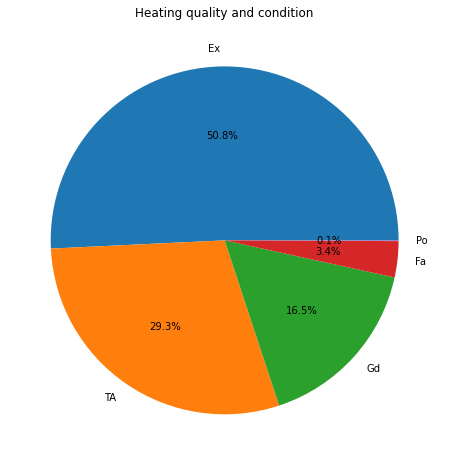

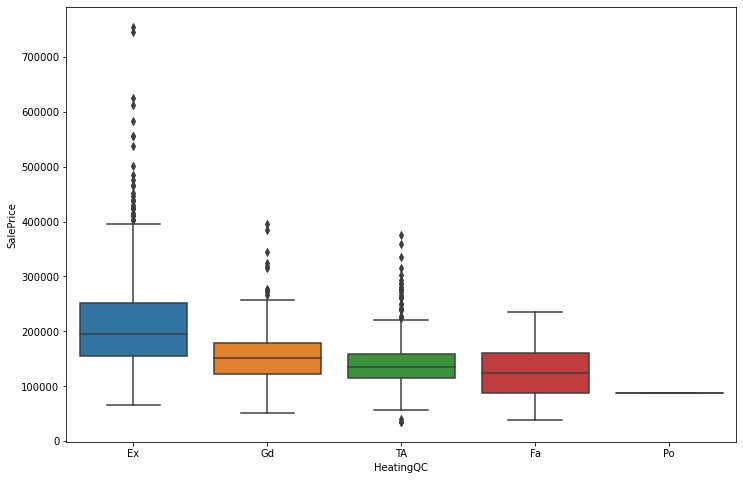

In [97]:
pie_box('HeatingQC', 'Heating quality and condition')

### CentralAir

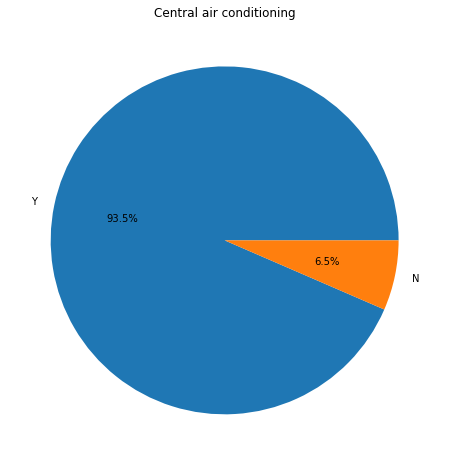

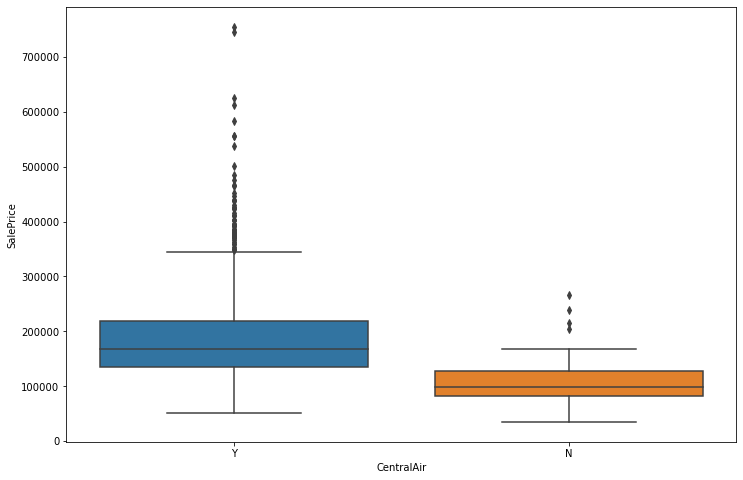

In [98]:
pie_box('CentralAir', 'Central air conditioning')

### Electrical

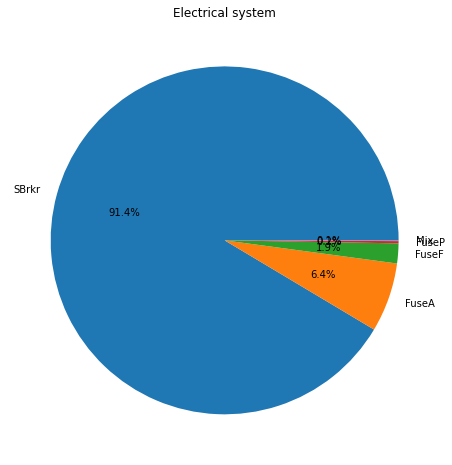

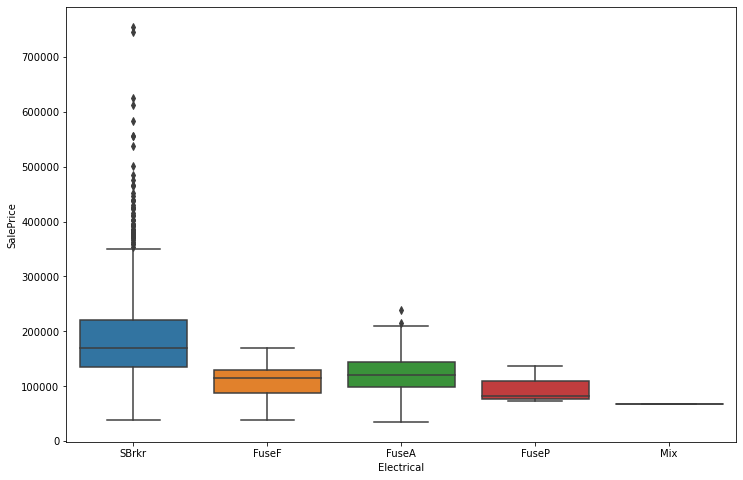

In [99]:
pie_box('Electrical', 'Electrical system')

In [100]:
train_data[train_data['Electrical'].isna()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1379  1380          80       RL         73.0     9735   Pave    NA      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1379         Lvl    AllPub    Inside       Gtl       Timber       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1379       Norm     1Fam       SLvl            5            5       2006   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1379          2007     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1379         0.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1379           No          Unf         0.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1379      384.0          384    GasA        Gd          Y        NaN   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1379       754       640             0       1394             0             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1379         2         1             3             1          Gd   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1379             7        Typ           0         NaN    BuiltIn       2007.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1379          Fin           2         400         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1379         100            0              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
1379         0    NaN   NaN         NaN        0       5    2008       WD   

     SaleCondition  SalePrice  
1379        Normal     167500

In [101]:
for dataset in combine:
    dataset['Electrical'] = dataset['Electrical'].fillna(train_data['Electrical'].mode()[0])

### 1stFlrSF

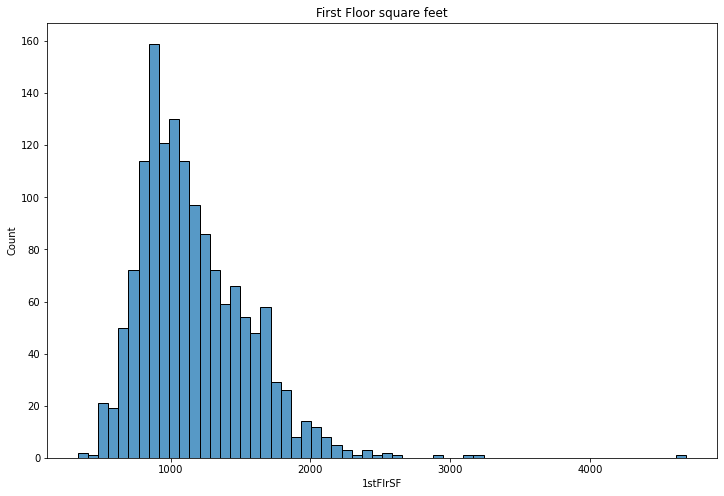

In [102]:
sns.histplot(train_data['1stFlrSF'], bins=60)
plt.title('First Floor square feet')
plt.show()

In [103]:
train_data['1stFlrSF'].corr(train_data['SalePrice'])

0.6058521846919148

### 2ndFlrSF

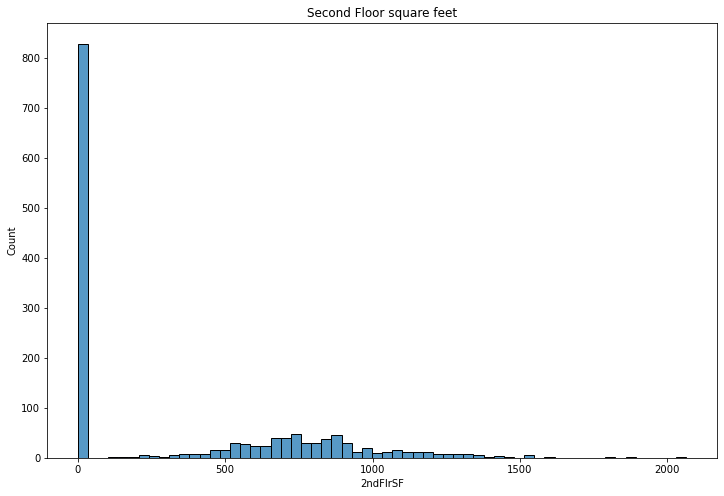

In [104]:
sns.histplot(train_data['2ndFlrSF'], bins=60)
plt.title('Second Floor square feet')
plt.show()

In [105]:
train_data['2ndFlrSF'].corr(train_data['SalePrice'])

0.31933380283206764

### LowQualFinSF

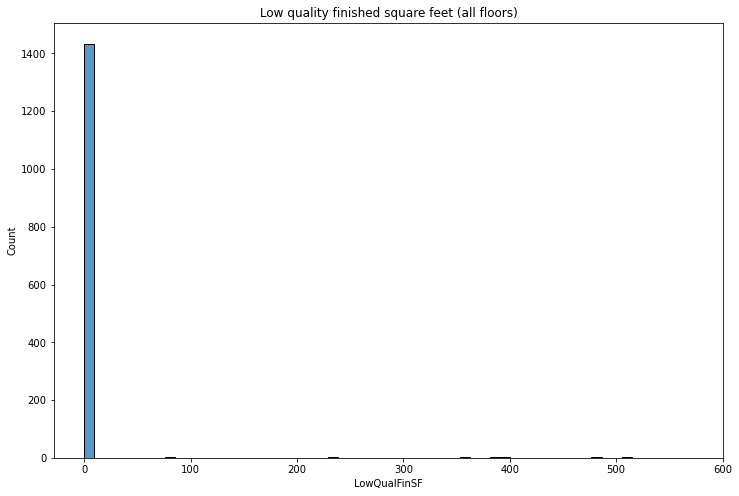

In [106]:
sns.histplot(train_data['LowQualFinSF'], bins=60)
plt.title('Low quality finished square feet (all floors)')
plt.show()

In [107]:
train_data['LowQualFinSF'].corr(train_data['SalePrice'])

-0.025606130000679586

In [108]:
train_data.query('LowQualFinSF > 0')['LowQualFinSF'].count()

26

### GrLivArea

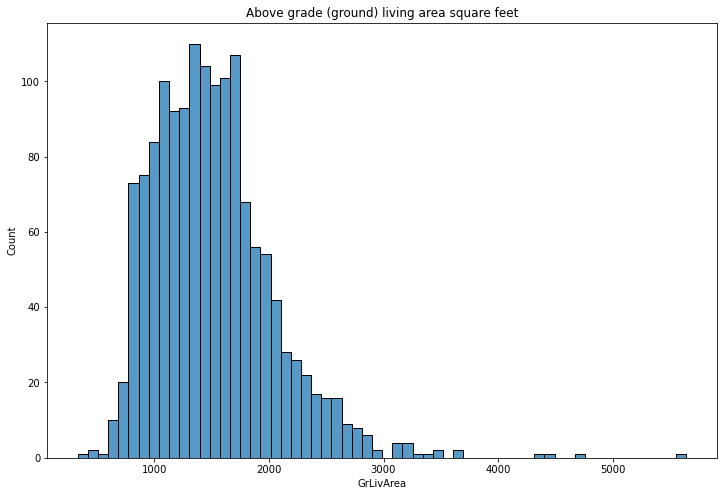

In [109]:
sns.histplot(train_data['GrLivArea'], bins=60)
plt.title('Above grade (ground) living area square feet')
plt.show()

In [110]:
train_data['GrLivArea'].corr(train_data['SalePrice'])

0.7086244776126522

### BsmtFullBath

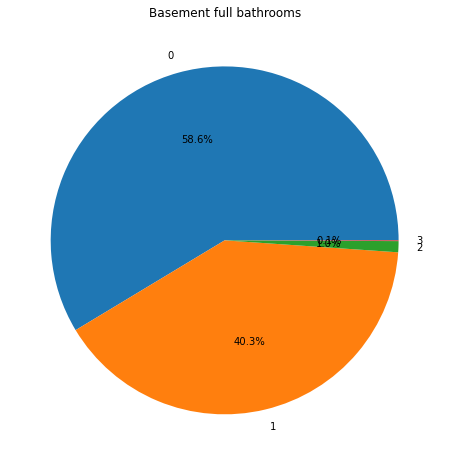

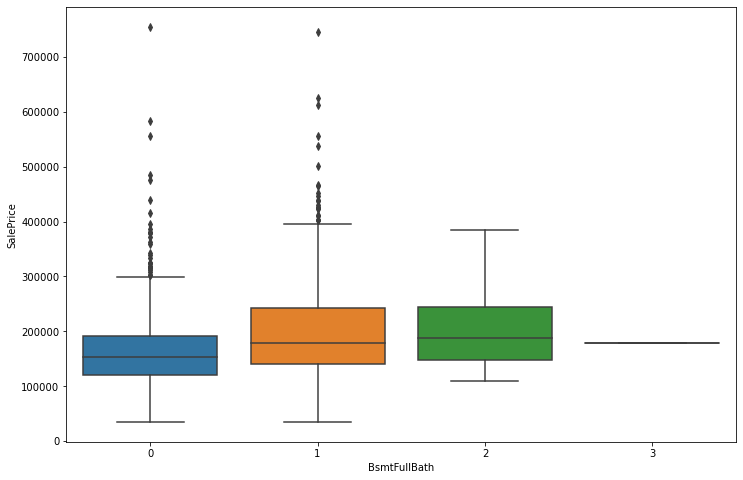

In [111]:
pie_box('BsmtFullBath', 'Basement full bathrooms')

In [112]:
test_data[test_data['BsmtFullBath'].isna()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
660  2121          20       RM         99.0     5940   Pave    NA      IR1   
728  2189          20       RL        123.0    47007   Pave    NA      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
660         Lvl    AllPub       FR3       Gtl      BrkSide      Feedr   
728         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
660       Norm     1Fam     1Story            4            7       1946   
728       Norm     1Fam     1Story            5            7       1959   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
660          1950     Gable  CompShg     MetalSd      CBlock       None   
728          1996     Gable  CompShg     Plywood     Plywood       None   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
660         0.0        TA        TA      PConc       NA       NA           NA   
728         0.0        TA        TA       Slab       NA       NA           NA   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
660           NA         0.0           NA         0.0        0.0          0.0   
728           NA         0.0           NA         0.0        0.0          0.0   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
660    GasA        TA          Y      FuseA       896         0             0   
728    GasA        TA          Y      SBrkr      3820         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
660        896           NaN           NaN         1         0             2   
728       3820           NaN           NaN         3         1             5   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
660             1          TA             4        Typ           0   
728             1          Ex            11        Typ           2   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
660         NaN     Detchd       1946.0          Unf         1.0       280.0   
728          Gd     Attchd       1959.0          Unf         2.0       624.0   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
660         TA         TA          Y           0            0              0   
728         TA         TA          Y           0          372              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  \
660          0            0         0    NaN  MnPrv         NaN        0   
728          0            0         0    NaN    NaN         NaN        0   

     MoSold  YrSold SaleType SaleCondition  
660       4    2008    ConLD       Abnorml  
728       7    2008       WD        Normal

There is no basement in this two houses, so there are no basement baths too.

In [113]:
for dataset in combine:
    dataset['BsmtFullBath'] = dataset['BsmtFullBath'].fillna(0)

### BsmtHalfBath

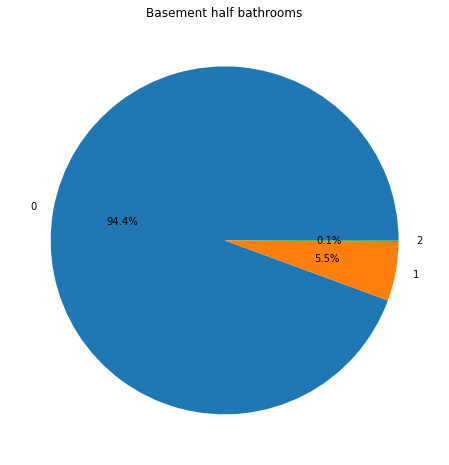

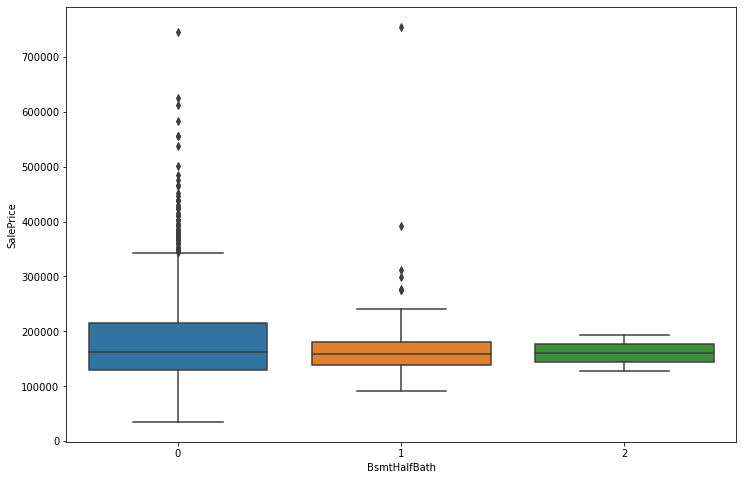

In [114]:
pie_box('BsmtHalfBath', 'Basement half bathrooms')

In [115]:
for dataset in combine:
    dataset['BsmtHalfBath'] = dataset['BsmtHalfBath'].fillna(0)

### FullBath

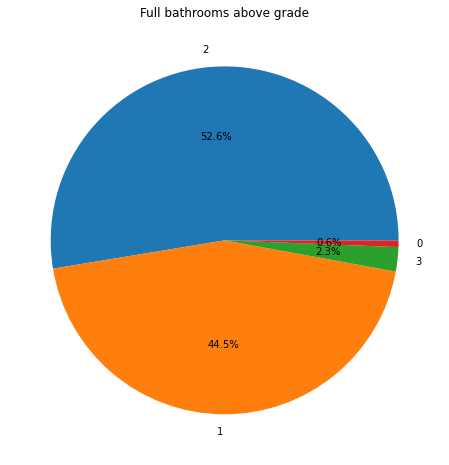

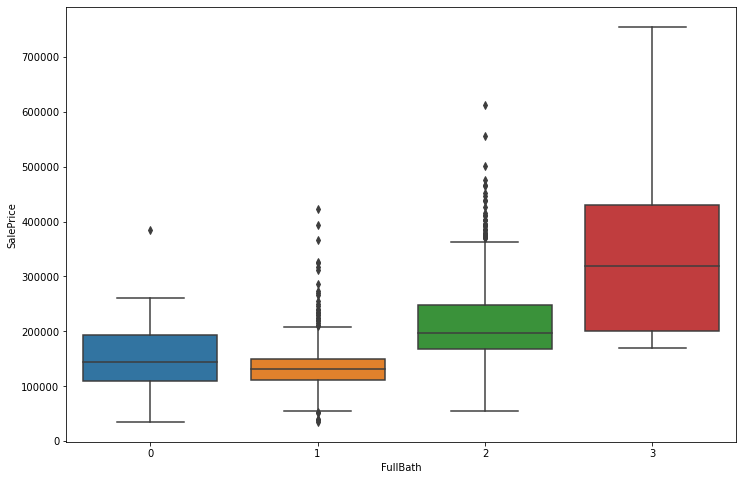

In [116]:
pie_box('FullBath', 'Full bathrooms above grade')

### HalfBath

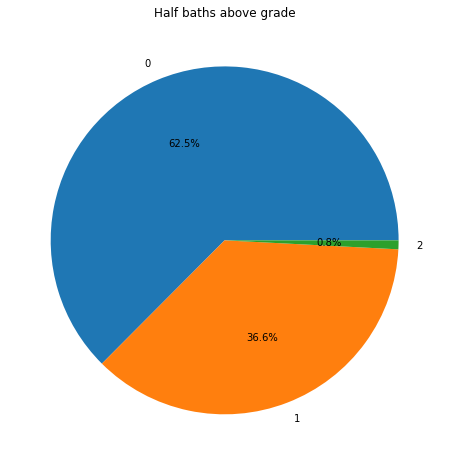

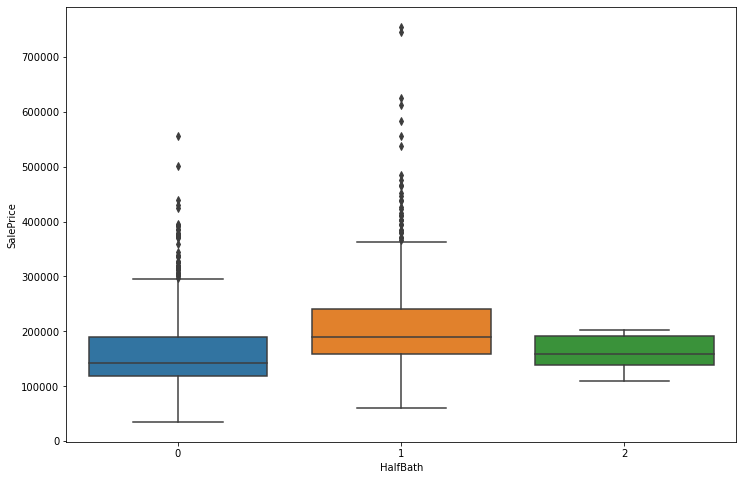

In [117]:
pie_box('HalfBath', 'Half baths above grade')

### BedroomAbvGr

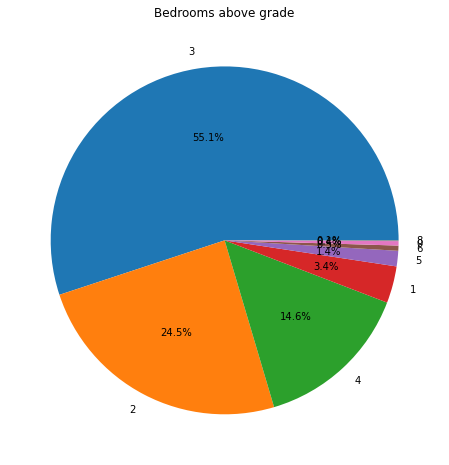

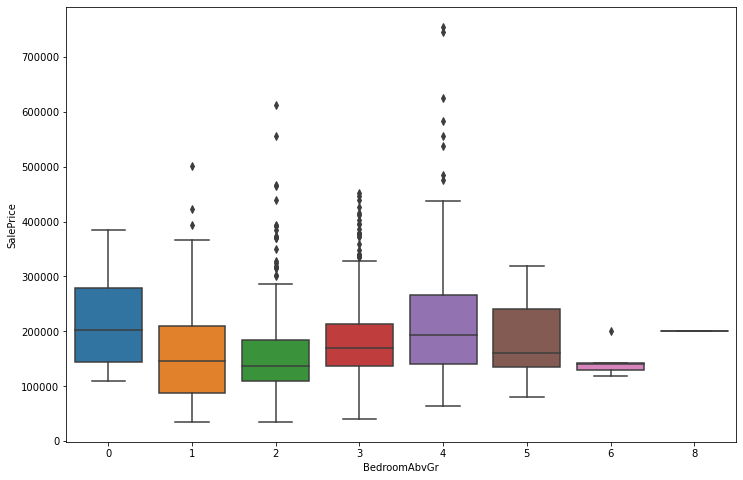

In [118]:
pie_box('BedroomAbvGr', 'Bedrooms above grade')

### KitchenAbvGr

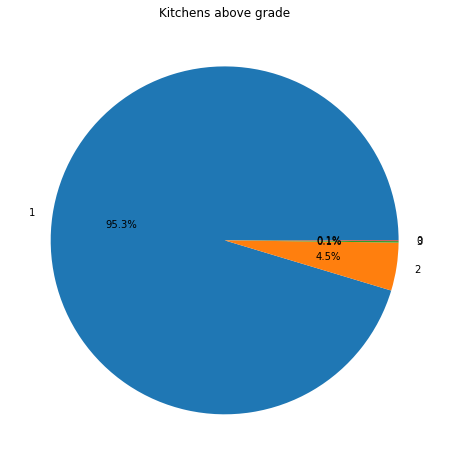

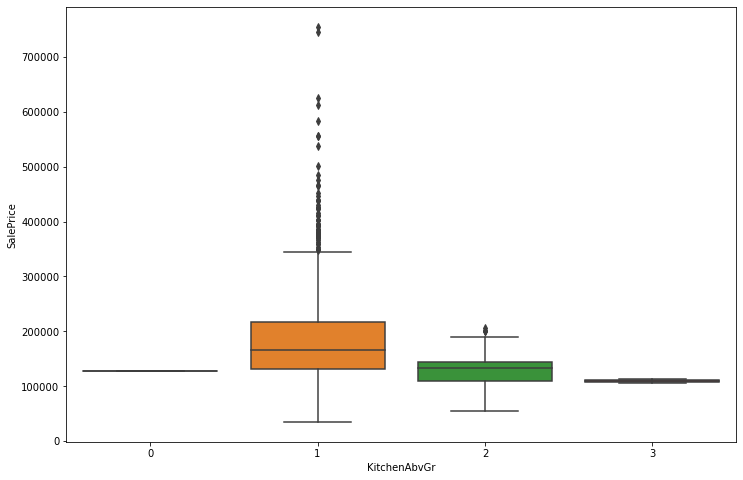

In [119]:
pie_box('KitchenAbvGr', 'Kitchens above grade')

### KitchenQual

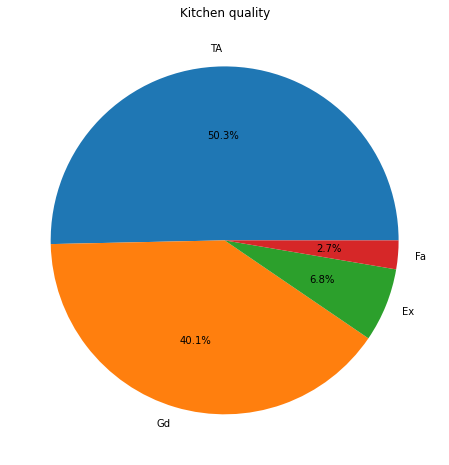

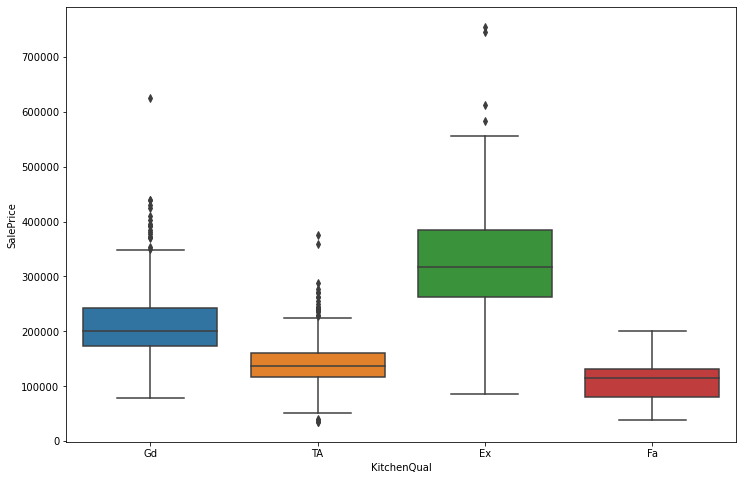

In [120]:
pie_box('KitchenQual', 'Kitchen quality')

In [121]:
for dataset in combine:
    dataset['KitchenQual'] = dataset['KitchenQual'].fillna(dataset['KitchenQual'].mode()[0])

### TotRmsAbvGrd

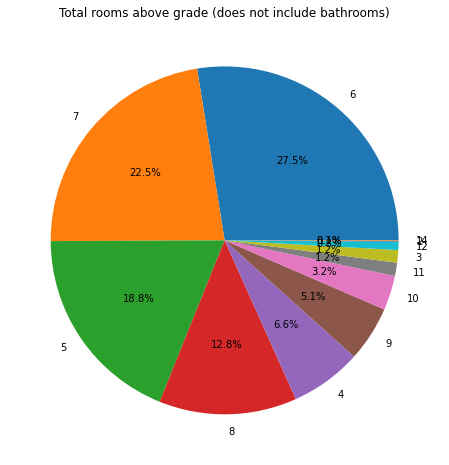

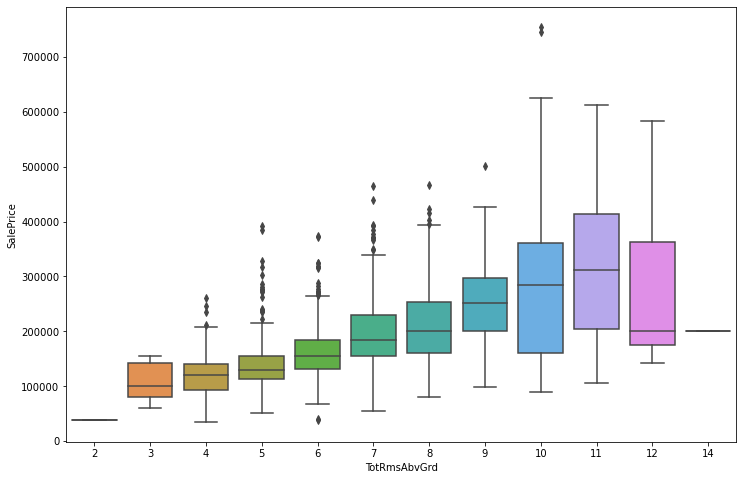

In [122]:
pie_box('TotRmsAbvGrd', 'Total rooms above grade (does not include bathrooms)')

Maybe it just correlates with the total area?

### Functional

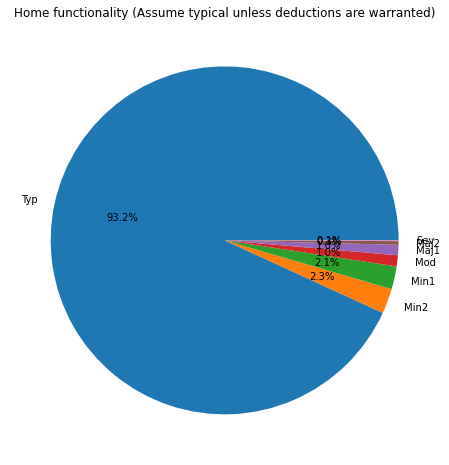

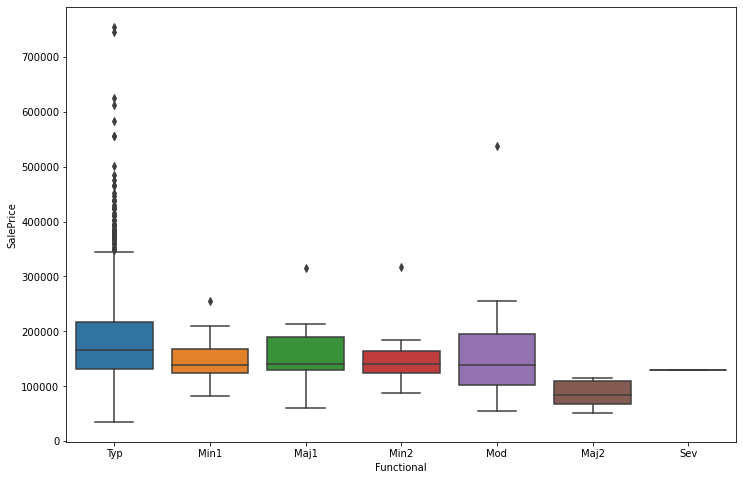

In [123]:
pie_box('Functional', 'Home functionality (Assume typical unless deductions are warranted)')

In [124]:
for dataset in combine:
    dataset['Functional'] = dataset['Functional'].fillna(dataset['Functional'].mode()[0])

### Fireplaces

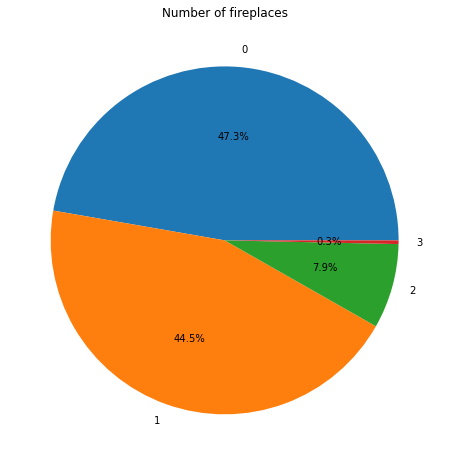

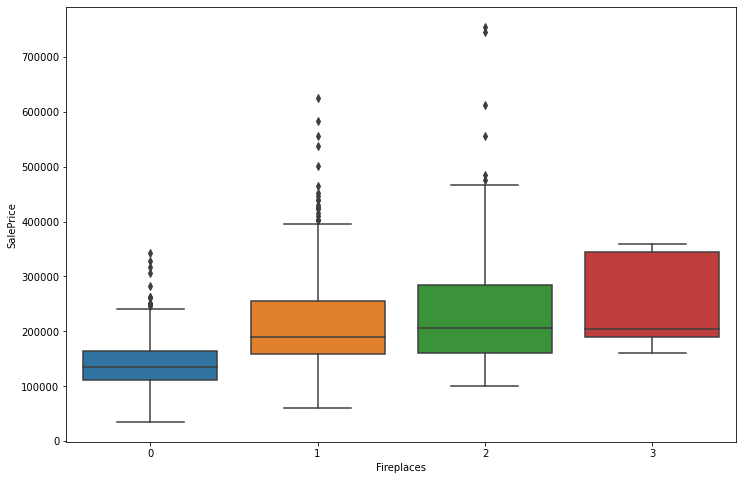

In [125]:
pie_box('Fireplaces', 'Number of fireplaces')

In [126]:
train_data[train_data['Fireplaces'] == 0]['Id'].count()

690

### FireplaceQu

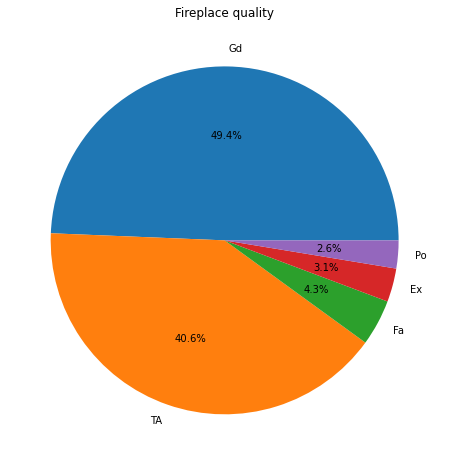

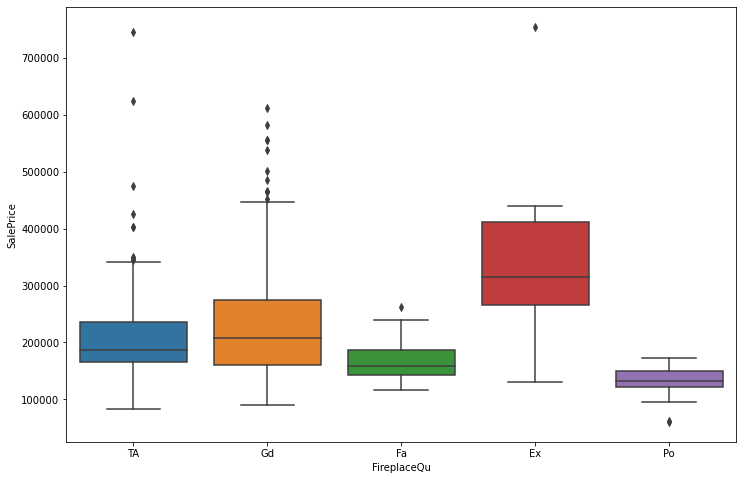

In [127]:
pie_box('FireplaceQu', 'Fireplace quality')

In [128]:
for dataset in combine:
    dataset['FireplaceQu'] = dataset['FireplaceQu'].fillna('NA')

### GarageType

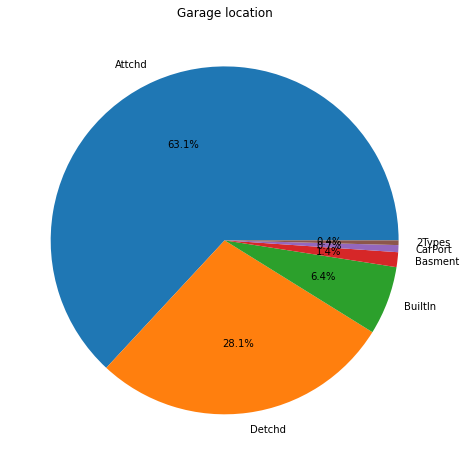

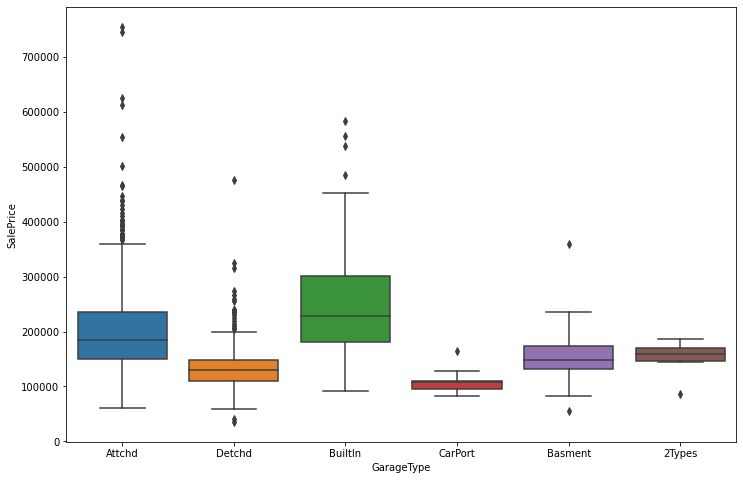

In [129]:
pie_box('GarageType', 'Garage location')

In [130]:
for dataset in combine:
    dataset['GarageType'] = dataset['GarageType'].fillna('NA')

### GarageYrBlt

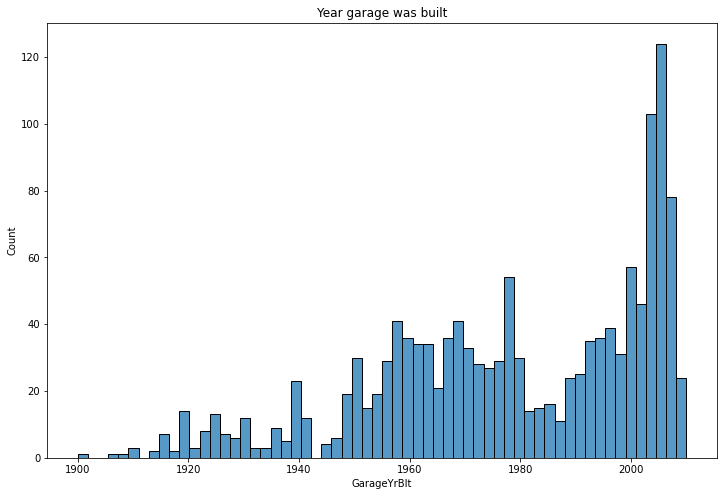

In [131]:
sns.histplot(train_data['GarageYrBlt'], bins=60)
plt.title('Year garage was built')
plt.show()

In [132]:
for dataset in combine:
    dataset['GarageYrBlt'] = dataset['GarageYrBlt'].fillna(dataset['YearBuilt'])

Corr with the house?

###  GarageFinish

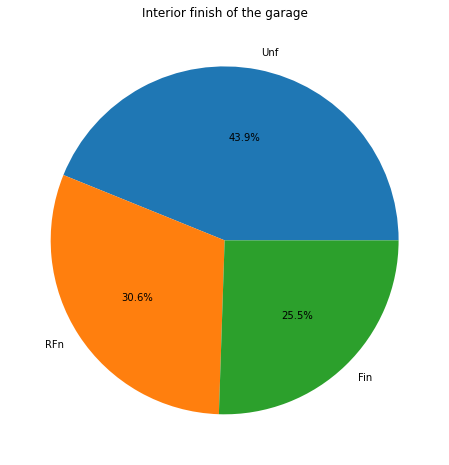

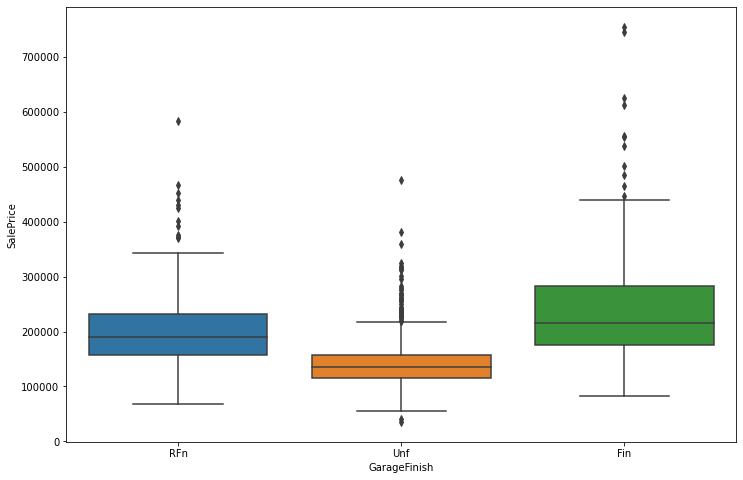

In [133]:
pie_box('GarageFinish', 'Interior finish of the garage')

In [134]:
for dataset in combine:
    dataset['GarageFinish'] = dataset['GarageFinish'].fillna('NA')

### GarageCars

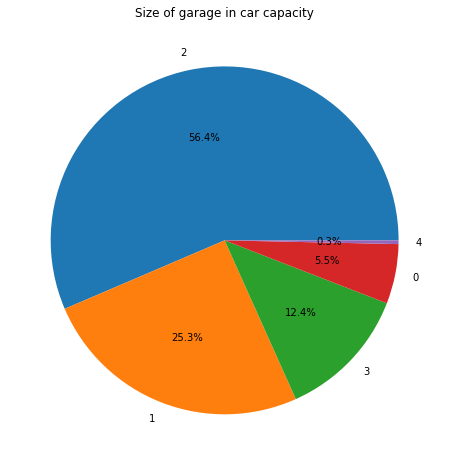

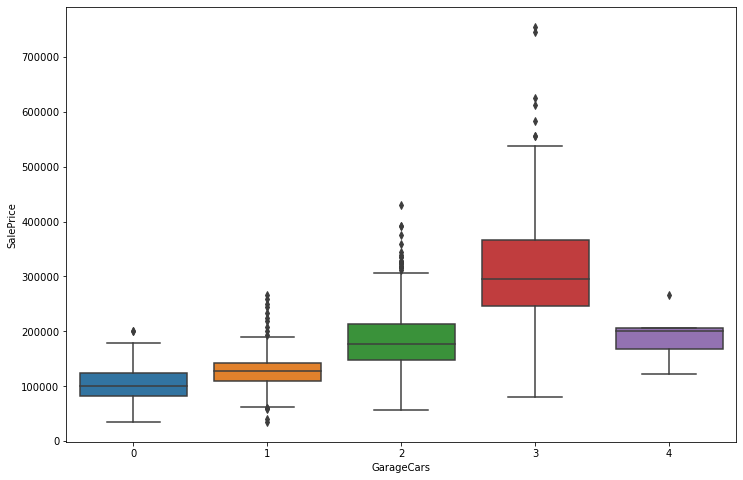

In [135]:
pie_box('GarageCars', 'Size of garage in car capacity')

In [136]:
for dataset in combine:
    dataset['GarageCars'] = dataset['GarageCars'].fillna(0)

### GarageArea

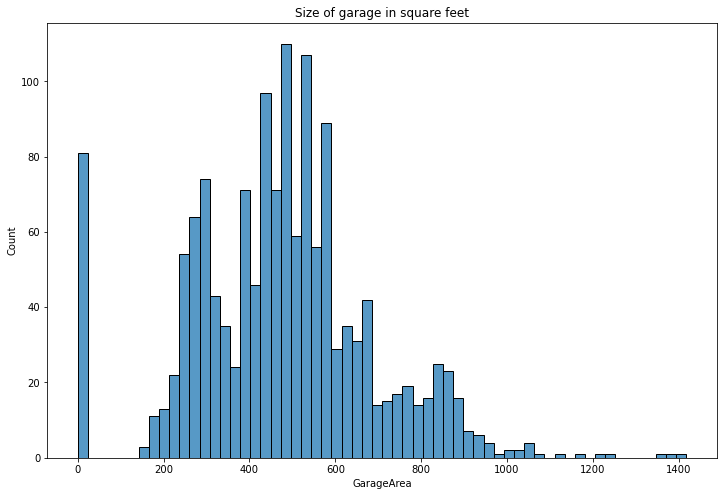

In [137]:
sns.histplot(train_data['GarageArea'], bins=60)
plt.title('Size of garage in square feet')
plt.show()

In [138]:
for dataset in combine:
    dataset['GarageArea'] = dataset['GarageArea'].fillna(0)

### GarageQual

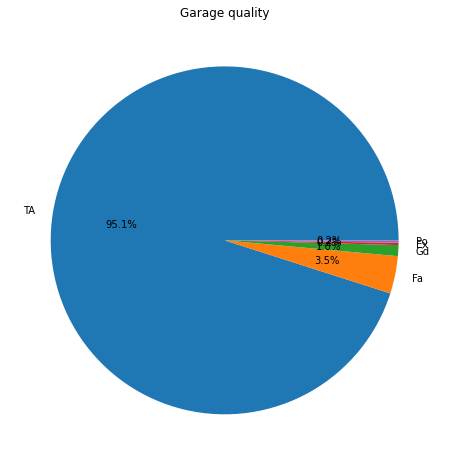

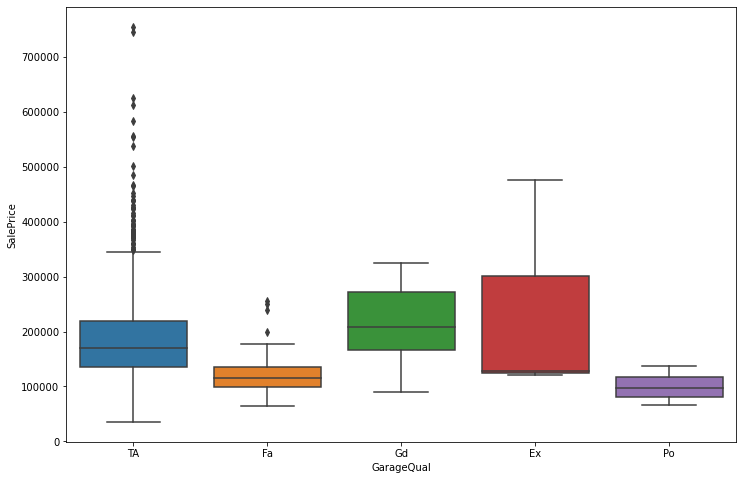

In [139]:
pie_box('GarageQual', 'Garage quality')

In [140]:
for dataset in combine:
    dataset['GarageQual'] = dataset['GarageQual'].fillna('NA')

### GarageCond

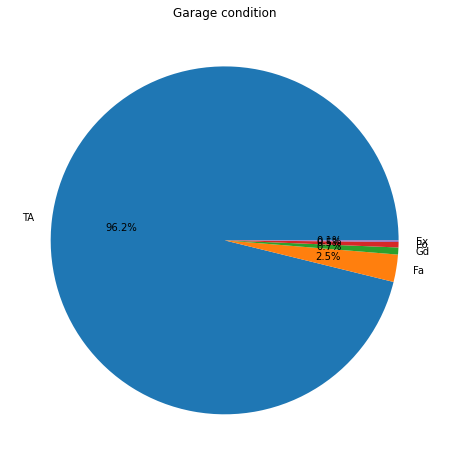

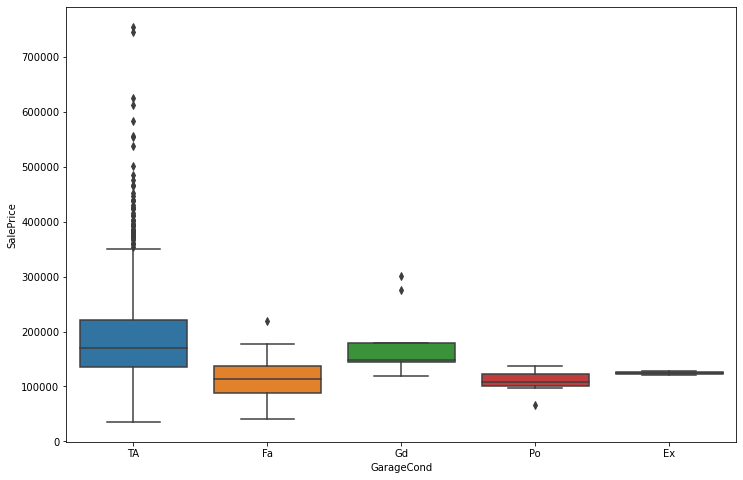

In [141]:
pie_box('GarageCond', 'Garage condition')

In [142]:
for dataset in combine:
    dataset['GarageCond'] = dataset['GarageCond'].fillna('NA')

### PavedDrive

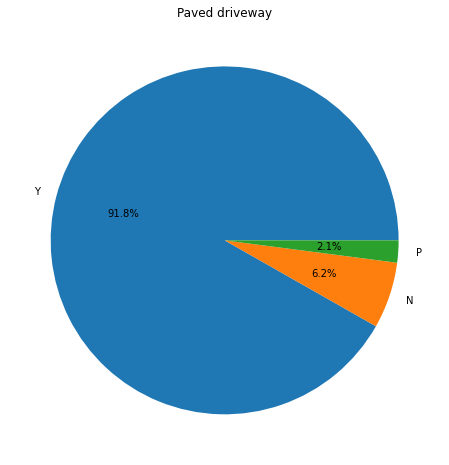

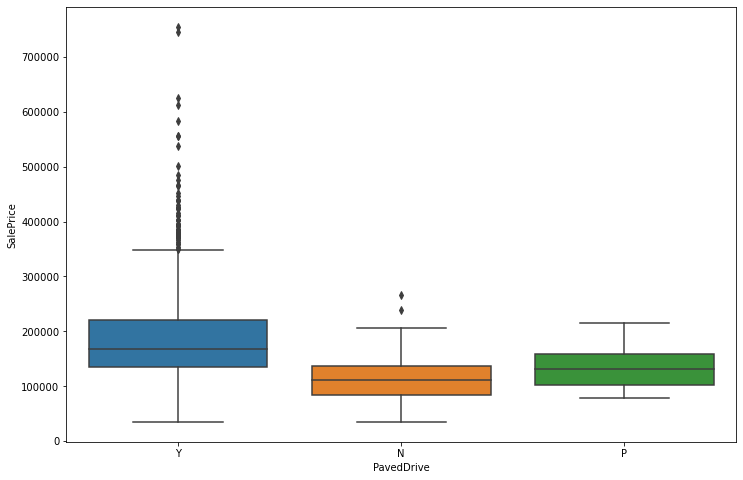

In [143]:
pie_box('PavedDrive', 'Paved driveway')

### WoodDeckSF

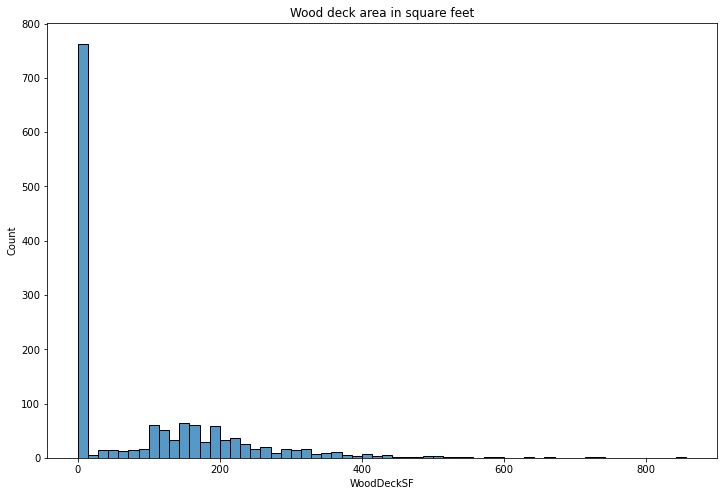

In [144]:
sns.histplot(train_data['WoodDeckSF'], bins=60)
plt.title('Wood deck area in square feet')
plt.show()

### OpenPorchSF

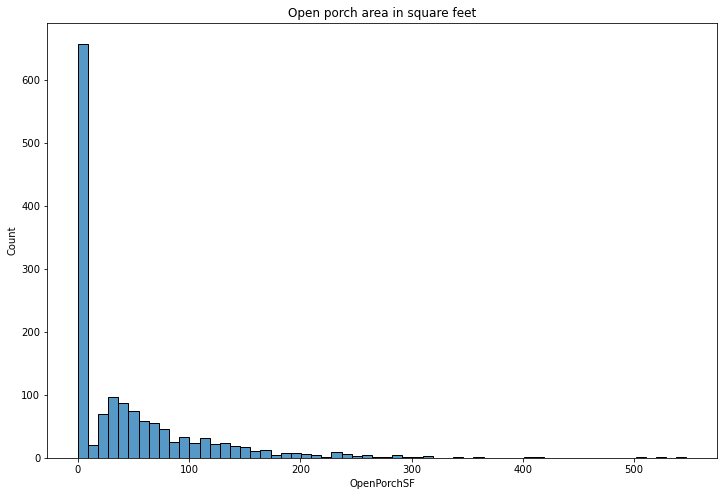

In [145]:
sns.histplot(train_data['OpenPorchSF'], bins=60)
plt.title('Open porch area in square feet')
plt.show()

### EnclosedPorch

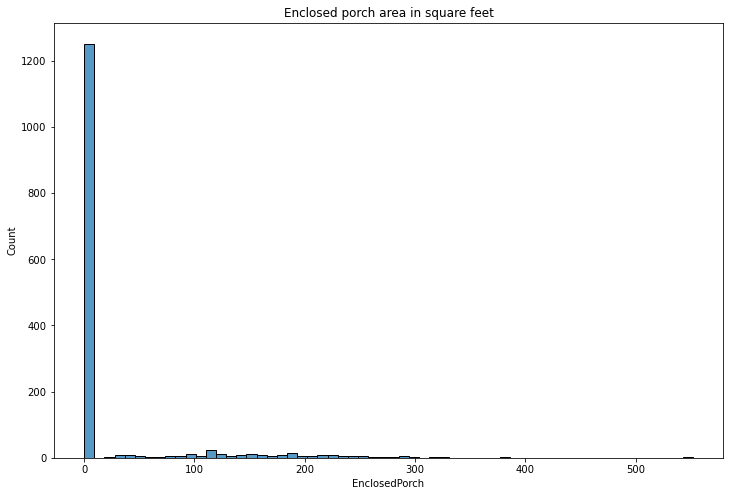

In [146]:
sns.histplot(train_data['EnclosedPorch'], bins=60)
plt.title('Enclosed porch area in square feet')
plt.show()

### 3SsnPorch

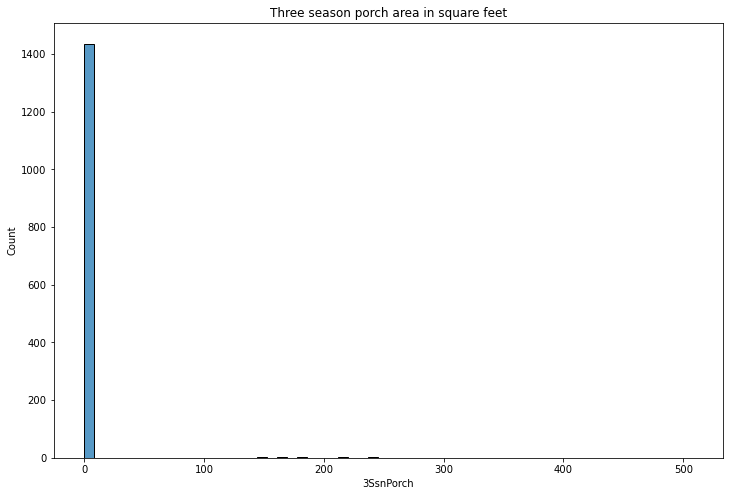

In [147]:
sns.histplot(train_data['3SsnPorch'], bins=60)
plt.title('Three season porch area in square feet')
plt.show()

### ScreenPorch

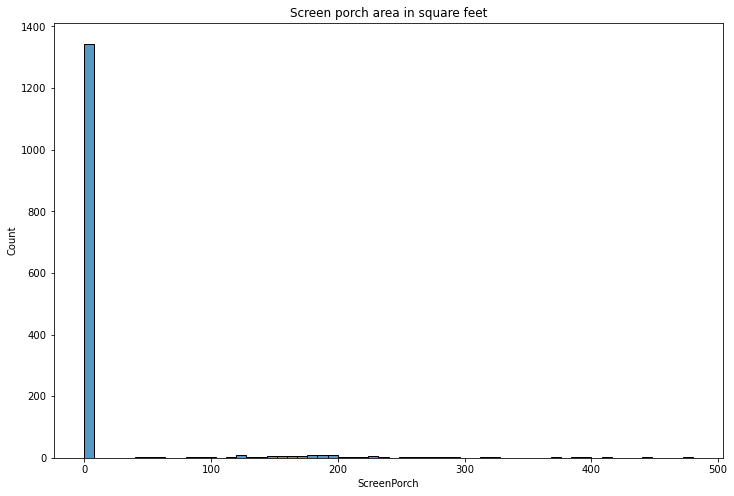

In [148]:
sns.histplot(train_data['ScreenPorch'], bins=60)
plt.title('Screen porch area in square feet')
plt.show()

### PoolArea

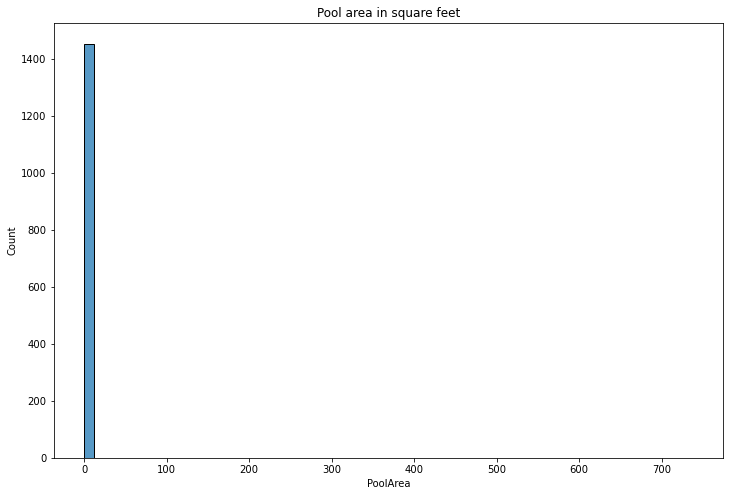

In [149]:
sns.histplot(train_data['PoolArea'], bins=60)
plt.title('Pool area in square feet')
plt.show()

### PoolQC

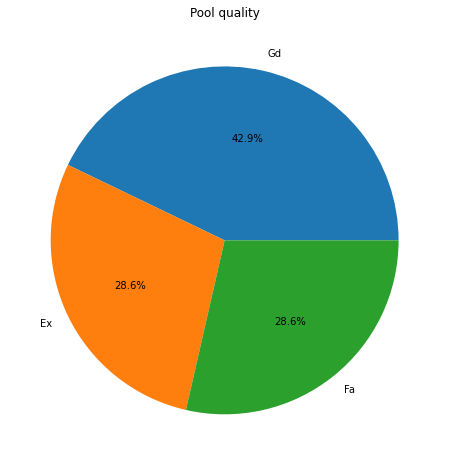

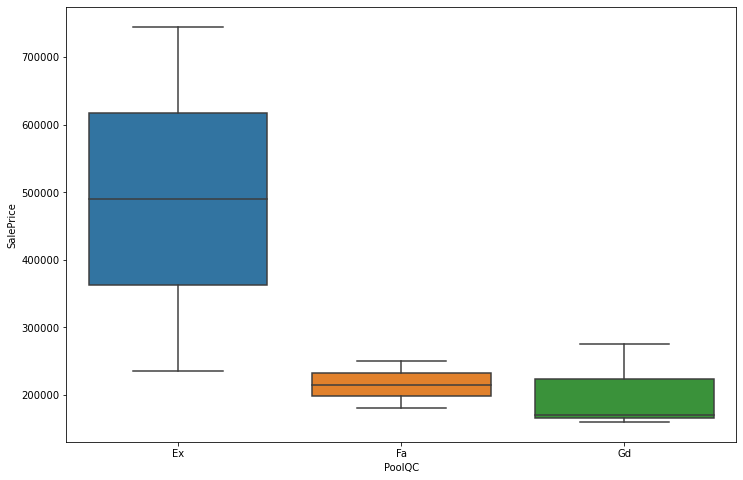

In [150]:
pie_box('PoolQC', 'Pool quality')

In [151]:
for dataset in combine:
    dataset.loc[dataset['PoolArea'] == 0, 'PoolQC'] = 'NA'
    dataset['PoolQC'] = dataset['PoolQC'].fillna(dataset['PoolQC'].mode()[0])

### Fence

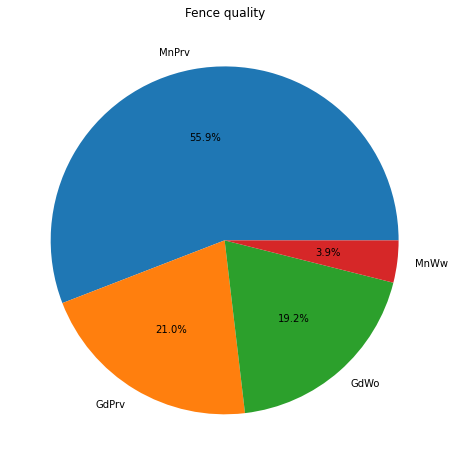

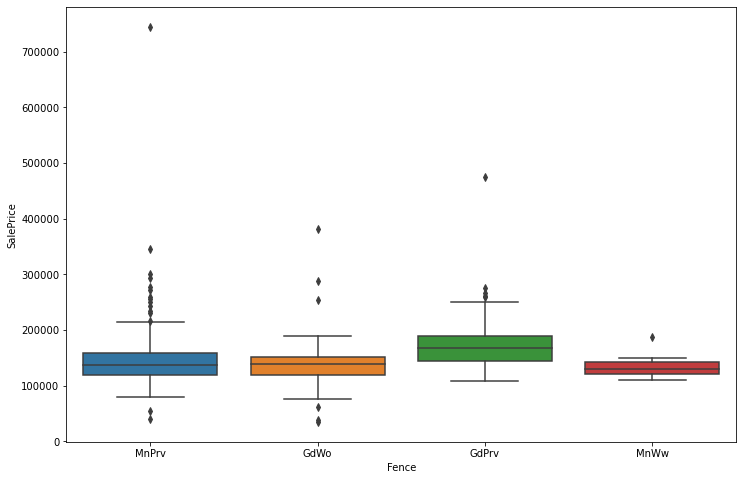

In [152]:
pie_box('Fence', 'Fence quality')

In [153]:
for dataset in combine:
    dataset['Fence'] = dataset['Fence'].fillna('NA')

### MiscFeature

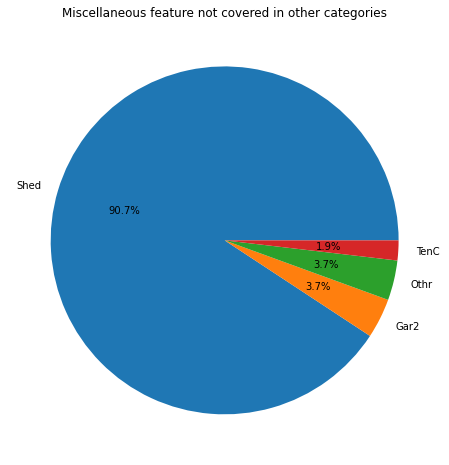

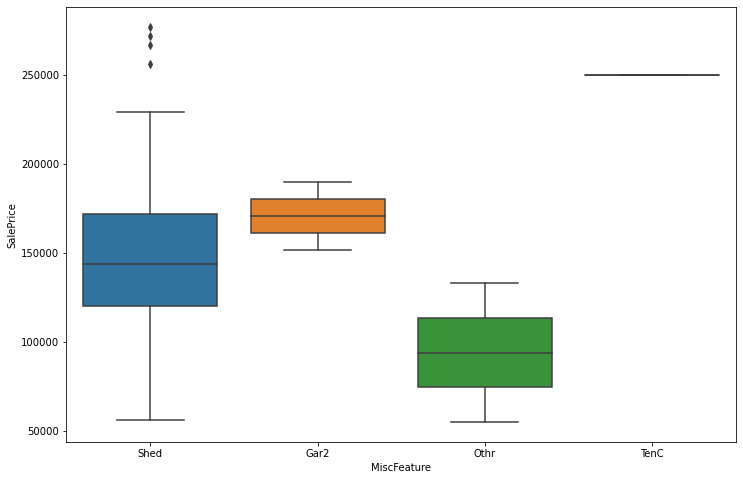

In [154]:
pie_box('MiscFeature', 'Miscellaneous feature not covered in other categories')

In [155]:
for dataset in combine:
    dataset['MiscFeature'] = dataset['MiscFeature'].fillna('NA')

### MiscVal

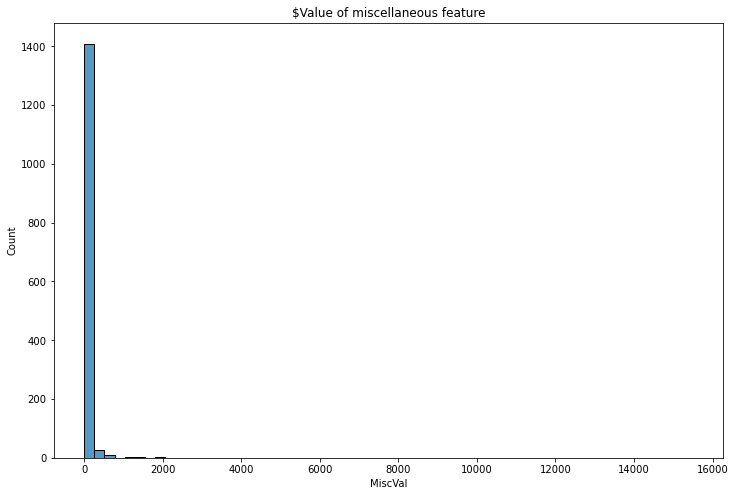

In [156]:
sns.histplot(train_data['MiscVal'], bins=60)
plt.title('$Value of miscellaneous feature')
plt.show()

In [157]:
for dataset in combine:
    dataset['MiscVal'] = dataset['MiscVal'].fillna(0)

### MoSold

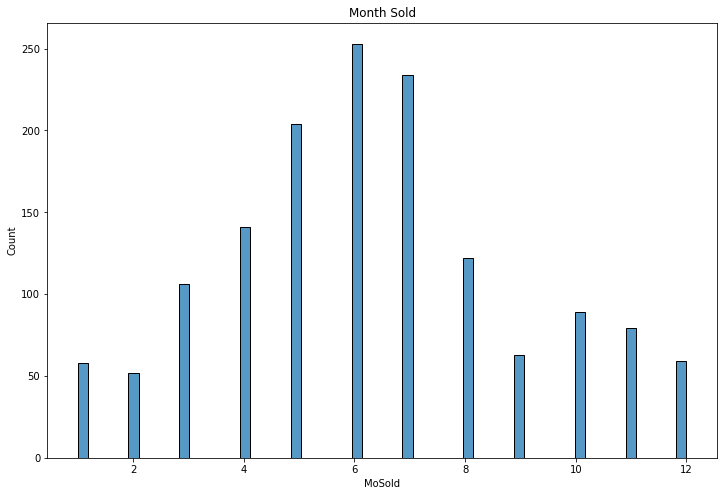

In [158]:
sns.histplot(train_data['MoSold'], bins=60)
plt.title('Month Sold')
plt.show()

### YrSold

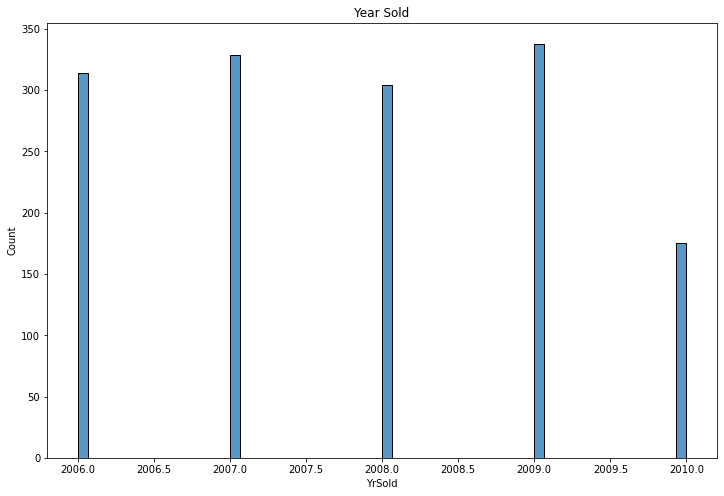

In [159]:
sns.histplot(train_data['YrSold'], bins=60)
plt.title('Year Sold')
plt.show()

### SaleType

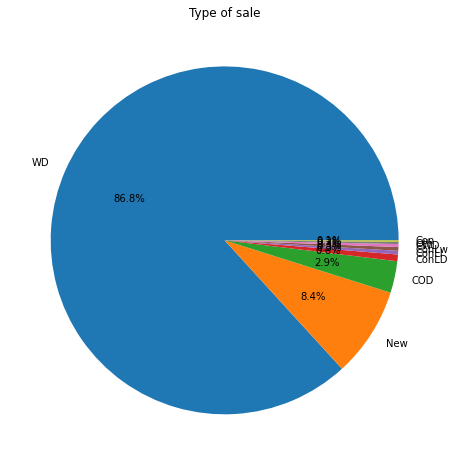

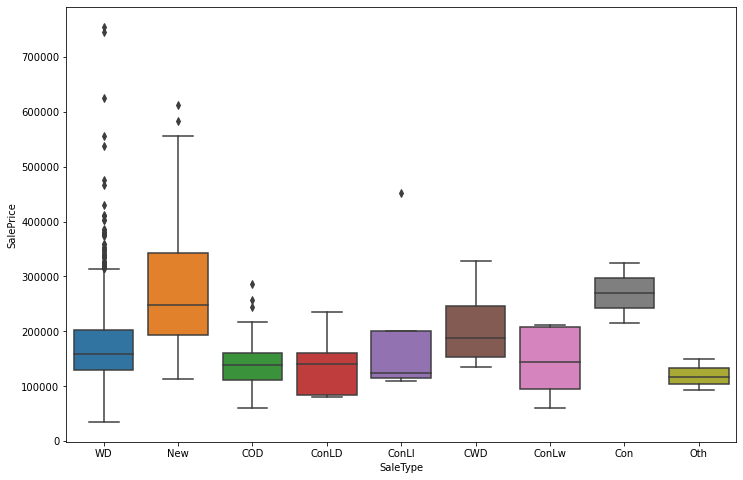

In [160]:
pie_box('SaleType', 'Type of sale')

In [161]:
for dataset in combine:
    dataset['SaleType'] = dataset['SaleType'].fillna(dataset['SaleType'].mode()[0])

### SaleCondition

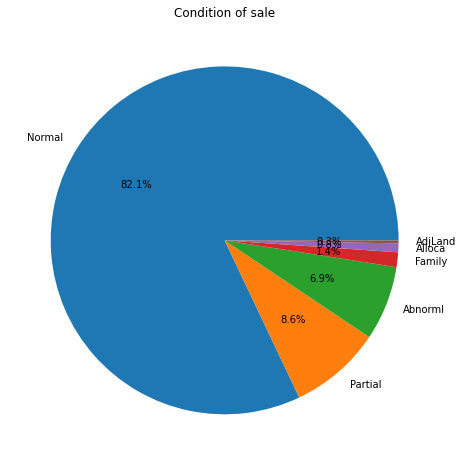

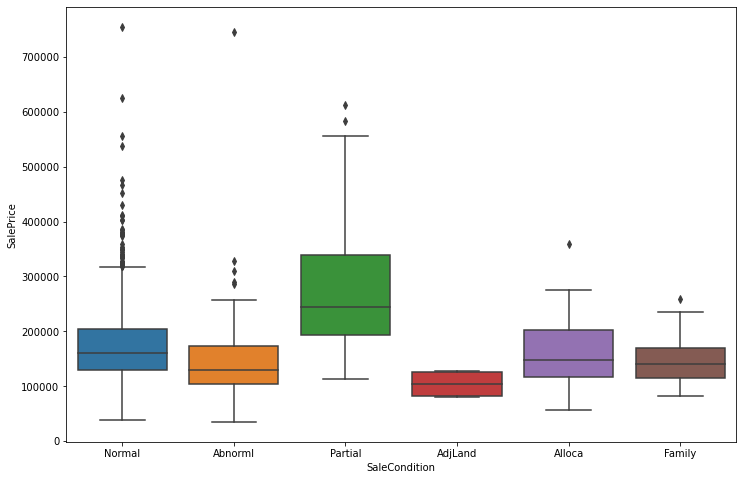

In [162]:
pie_box('SaleCondition', 'Condition of sale')

## Preparing Samples

In [163]:
test_index = test_data['Id']

In [164]:
for dataset in combine:
    dataset.drop(['Id'], axis=1, inplace=True)

In [165]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [166]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [167]:
cols_to_cast = []
for col in train_data.drop('SalePrice', axis=1).columns:
    if train_data[col].dtype != test_data[col].dtype:
        print(col)
        print(train_data[col].dtype)
        print(test_data[col].dtype)
        print()

TotalBsmtSF
int64
float64

BsmtFullBath
int64
float64

BsmtHalfBath
int64
float64

GarageCars
int64
float64

GarageArea
int64
float64



In [168]:
for col in cols_to_cast:
    test_data[col] = test_data[col].astype('int')

In [170]:
features = train_data.drop('SalePrice', axis=1)
target = train_data['SalePrice']

In [171]:
cat_cols = features.select_dtypes(include=["object"]).columns.to_list()

In [172]:
features_train, features_val, target_train, target_val = train_test_split(features, target)

In [173]:
cat = CatBoostRegressor(random_seed=42, loss_function='RMSE')

In [174]:
cat.fit(features_train, target_train, cat_features=cat_cols)

Learning rate set to 0.041534
0:	learn: 80496.4303151	total: 59.5ms	remaining: 59.4s
1:	learn: 78505.5731003	total: 73.1ms	remaining: 36.5s
2:	learn: 76515.2554865	total: 84.8ms	remaining: 28.2s
3:	learn: 74668.8056093	total: 96.2ms	remaining: 23.9s
4:	learn: 72934.1905854	total: 110ms	remaining: 21.8s
5:	learn: 71321.9193237	total: 115ms	remaining: 19.1s
6:	learn: 69804.6654585	total: 129ms	remaining: 18.3s
7:	learn: 68109.5934907	total: 142ms	remaining: 17.7s
8:	learn: 66699.9692395	total: 155ms	remaining: 17.1s
9:	learn: 65145.6779356	total: 166ms	remaining: 16.4s
10:	learn: 63847.7432557	total: 181ms	remaining: 16.2s
11:	learn: 62497.3263406	total: 192ms	remaining: 15.8s
12:	learn: 61216.0793359	total: 206ms	remaining: 15.7s
13:	learn: 59966.4858249	total: 220ms	remaining: 15.5s
14:	learn: 58650.8539799	total: 233ms	remaining: 15.3s
15:	learn: 57500.1702140	total: 245ms	remaining: 15.1s
16:	learn: 56252.0125846	total: 259ms	remaining: 15s
17:	learn: 55193.7257415	total: 270ms	remai

150:	learn: 20955.9413148	total: 1.95s	remaining: 11s
151:	learn: 20908.4505957	total: 1.96s	remaining: 10.9s
152:	learn: 20855.5552365	total: 1.97s	remaining: 10.9s
153:	learn: 20820.0839562	total: 1.98s	remaining: 10.9s
154:	learn: 20777.1545244	total: 1.99s	remaining: 10.8s
155:	learn: 20729.1967708	total: 2s	remaining: 10.8s
156:	learn: 20687.4651503	total: 2.01s	remaining: 10.8s
157:	learn: 20626.3648208	total: 2.02s	remaining: 10.8s
158:	learn: 20559.9073875	total: 2.04s	remaining: 10.8s
159:	learn: 20505.4508689	total: 2.05s	remaining: 10.8s
160:	learn: 20433.7955735	total: 2.06s	remaining: 10.7s
161:	learn: 20362.8913059	total: 2.07s	remaining: 10.7s
162:	learn: 20307.3476653	total: 2.08s	remaining: 10.7s
163:	learn: 20265.9543282	total: 2.09s	remaining: 10.7s
164:	learn: 20214.7230315	total: 2.1s	remaining: 10.7s
165:	learn: 20149.7933368	total: 2.12s	remaining: 10.6s
166:	learn: 20092.7972496	total: 2.13s	remaining: 10.6s
167:	learn: 20022.3239615	total: 2.14s	remaining: 10.6

299:	learn: 15989.4189549	total: 3.68s	remaining: 8.59s
300:	learn: 15964.9689319	total: 3.69s	remaining: 8.57s
301:	learn: 15949.7828463	total: 3.7s	remaining: 8.56s
302:	learn: 15919.2131432	total: 3.72s	remaining: 8.55s
303:	learn: 15909.6784136	total: 3.73s	remaining: 8.54s
304:	learn: 15900.8700045	total: 3.74s	remaining: 8.52s
305:	learn: 15865.1490290	total: 3.75s	remaining: 8.51s
306:	learn: 15852.7919922	total: 3.76s	remaining: 8.49s
307:	learn: 15837.5052688	total: 3.77s	remaining: 8.47s
308:	learn: 15803.1685351	total: 3.78s	remaining: 8.46s
309:	learn: 15773.5510681	total: 3.8s	remaining: 8.45s
310:	learn: 15748.8836911	total: 3.81s	remaining: 8.44s
311:	learn: 15745.0910289	total: 3.82s	remaining: 8.43s
312:	learn: 15708.4361795	total: 3.83s	remaining: 8.41s
313:	learn: 15694.8035278	total: 3.84s	remaining: 8.39s
314:	learn: 15691.3630259	total: 3.85s	remaining: 8.38s
315:	learn: 15657.1275364	total: 3.87s	remaining: 8.37s
316:	learn: 15653.2482235	total: 3.88s	remaining: 

455:	learn: 13446.7677060	total: 5.45s	remaining: 6.5s
456:	learn: 13428.4968245	total: 5.46s	remaining: 6.49s
457:	learn: 13412.5649947	total: 5.48s	remaining: 6.48s
458:	learn: 13394.3057546	total: 5.49s	remaining: 6.47s
459:	learn: 13389.8964692	total: 5.5s	remaining: 6.46s
460:	learn: 13370.9693973	total: 5.51s	remaining: 6.44s
461:	learn: 13369.3159228	total: 5.53s	remaining: 6.43s
462:	learn: 13358.9800810	total: 5.54s	remaining: 6.42s
463:	learn: 13344.1423335	total: 5.55s	remaining: 6.42s
464:	learn: 13326.6278444	total: 5.57s	remaining: 6.4s
465:	learn: 13321.3214813	total: 5.58s	remaining: 6.39s
466:	learn: 13318.5113359	total: 5.59s	remaining: 6.38s
467:	learn: 13299.2717482	total: 5.61s	remaining: 6.37s
468:	learn: 13272.1622924	total: 5.62s	remaining: 6.36s
469:	learn: 13264.7138587	total: 5.63s	remaining: 6.35s
470:	learn: 13246.7639165	total: 5.64s	remaining: 6.34s
471:	learn: 13236.5164644	total: 5.66s	remaining: 6.33s
472:	learn: 13198.7884559	total: 5.67s	remaining: 6

613:	learn: 11380.3941930	total: 7.29s	remaining: 4.58s
614:	learn: 11378.6338973	total: 7.3s	remaining: 4.57s
615:	learn: 11367.8087544	total: 7.32s	remaining: 4.56s
616:	learn: 11348.2570396	total: 7.32s	remaining: 4.55s
617:	learn: 11329.9177436	total: 7.33s	remaining: 4.53s
618:	learn: 11322.4285085	total: 7.34s	remaining: 4.52s
619:	learn: 11308.5472000	total: 7.36s	remaining: 4.51s
620:	learn: 11306.5171672	total: 7.37s	remaining: 4.5s
621:	learn: 11302.3928896	total: 7.38s	remaining: 4.48s
622:	learn: 11293.8846146	total: 7.39s	remaining: 4.47s
623:	learn: 11289.0083320	total: 7.4s	remaining: 4.46s
624:	learn: 11272.8058062	total: 7.41s	remaining: 4.45s
625:	learn: 11251.7480416	total: 7.42s	remaining: 4.43s
626:	learn: 11238.3758908	total: 7.43s	remaining: 4.42s
627:	learn: 11228.2111757	total: 7.44s	remaining: 4.41s
628:	learn: 11202.8616100	total: 7.45s	remaining: 4.39s
629:	learn: 11187.4903808	total: 7.46s	remaining: 4.38s
630:	learn: 11180.8652468	total: 7.47s	remaining: 4

762:	learn: 9969.8748003	total: 8.94s	remaining: 2.78s
763:	learn: 9969.1017233	total: 8.96s	remaining: 2.77s
764:	learn: 9962.8782651	total: 8.97s	remaining: 2.75s
765:	learn: 9948.9909658	total: 8.98s	remaining: 2.74s
766:	learn: 9939.6345944	total: 8.99s	remaining: 2.73s
767:	learn: 9922.0356871	total: 9s	remaining: 2.72s
768:	learn: 9919.2540188	total: 9.01s	remaining: 2.71s
769:	learn: 9915.9305731	total: 9.02s	remaining: 2.69s
770:	learn: 9911.7906227	total: 9.04s	remaining: 2.68s
771:	learn: 9884.1200310	total: 9.05s	remaining: 2.67s
772:	learn: 9878.8621096	total: 9.06s	remaining: 2.66s
773:	learn: 9867.2052734	total: 9.07s	remaining: 2.65s
774:	learn: 9859.9142829	total: 9.08s	remaining: 2.63s
775:	learn: 9854.5473297	total: 9.09s	remaining: 2.62s
776:	learn: 9844.5967855	total: 9.1s	remaining: 2.61s
777:	learn: 9844.3767586	total: 9.11s	remaining: 2.6s
778:	learn: 9830.0147455	total: 9.12s	remaining: 2.59s
779:	learn: 9815.8453448	total: 9.13s	remaining: 2.58s
780:	learn: 981

914:	learn: 8808.7804749	total: 10.7s	remaining: 991ms
915:	learn: 8793.1969340	total: 10.7s	remaining: 979ms
916:	learn: 8786.5348597	total: 10.7s	remaining: 967ms
917:	learn: 8783.3005667	total: 10.7s	remaining: 956ms
918:	learn: 8771.1344557	total: 10.7s	remaining: 944ms
919:	learn: 8767.9096380	total: 10.7s	remaining: 932ms
920:	learn: 8762.8316039	total: 10.7s	remaining: 921ms
921:	learn: 8762.0883696	total: 10.7s	remaining: 909ms
922:	learn: 8755.6988237	total: 10.8s	remaining: 898ms
923:	learn: 8728.7367712	total: 10.8s	remaining: 886ms
924:	learn: 8718.2456594	total: 10.8s	remaining: 874ms
925:	learn: 8713.1607367	total: 10.8s	remaining: 863ms
926:	learn: 8707.1592777	total: 10.8s	remaining: 851ms
927:	learn: 8703.3324857	total: 10.8s	remaining: 840ms
928:	learn: 8680.0845429	total: 10.8s	remaining: 828ms
929:	learn: 8670.9132030	total: 10.8s	remaining: 816ms
930:	learn: 8665.2518168	total: 10.9s	remaining: 805ms
931:	learn: 8655.0536414	total: 10.9s	remaining: 793ms
932:	learn

In [175]:
mean_squared_error(cat.predict(features_val), target_val) ** 0.5

17316.38741236351

In [176]:
test_answers = cat.predict(test_data)

In [177]:
submission = pd.DataFrame([test_index, test_answers]).transpose()
submission.columns = ['Id', 'SalePrice']
submission['Id'] = submission['Id'].astype('int')
submission.to_csv('Submission', index=False)

### Feature Importance

In [183]:
feats = {}
for feature, importance in zip(train_data.drop(['SalePrice'], axis=1).columns, cat.feature_importances_):
    feats[feature] = importance

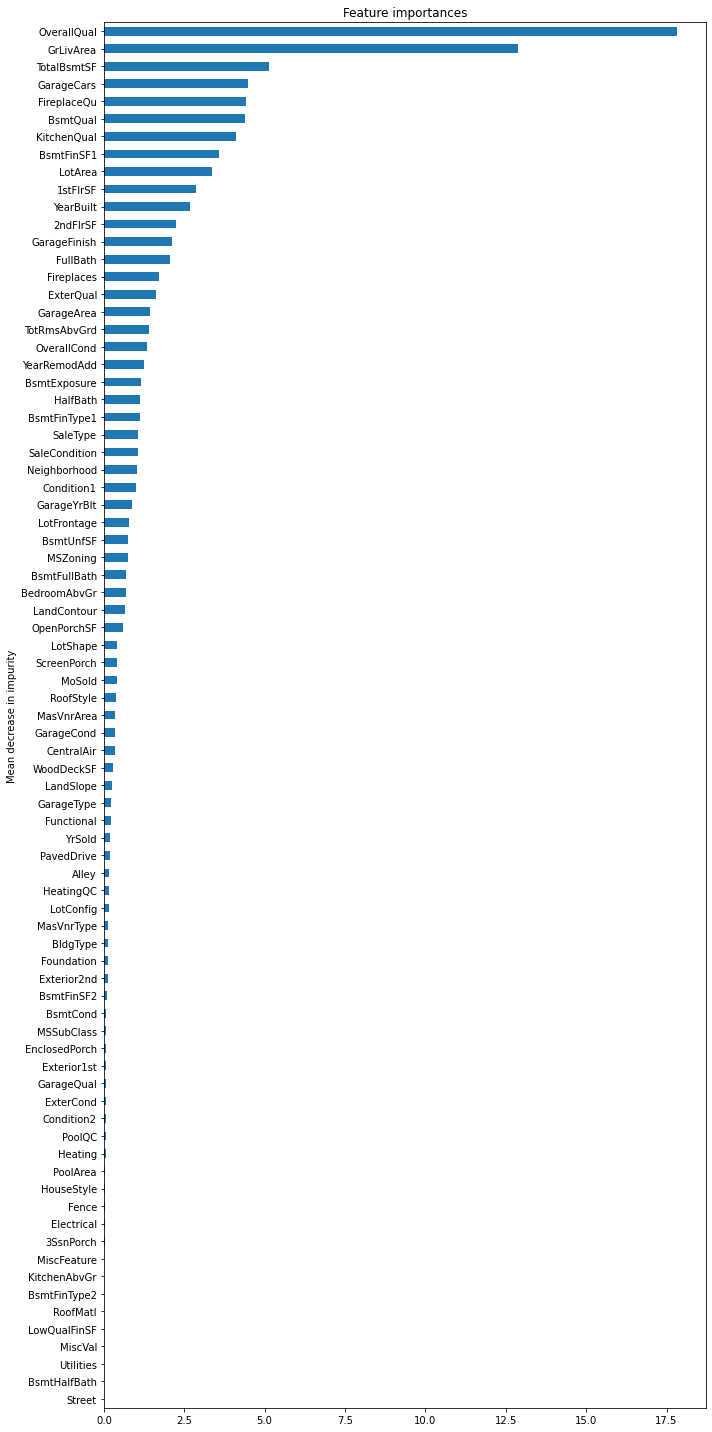

In [194]:
feats = pd.Series(feats)

fig, ax = plt.subplots(figsize=(10, 20))
feats.sort_values(ascending=True).plot.barh(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [178]:
dfhshfs

NameError: name 'dfhshfs' is not defined

In [ ]:
#train_data = train_data.drop(['PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'Alley'], axis=1)

In [ ]:
#train_data = train_data.fillna('NA')

In [ ]:
#test_data = test_data.drop(['PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'Alley', 'Id'], axis=1)

In [ ]:
#test_data = test_data.fillna('NA')

In [ ]:
#cat_features=['MSSubClass', 'MSZoning', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 
       'Functional', 'Fireplaces', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition']

In [ ]:
#train_data_num = train_data.select_dtypes(exclude=["object"])
#train_data_num.head()

In [ ]:
#train_data_cat = train_data.select_dtypes(exclude=[np.number])
#train_data_cat.head()

32820.49106046687
27273.655676932787